In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd


In [ ]:
!pip install xlrd


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install openpyxl --upgrade


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import xlrd

In [ ]:
missing_values = ["n/a", "na", "--"]

In [ ]:
df1 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/Raw_data-sixth-dataset/CLIN_LAB_DATA_RAD-Covid.xlsx - Sheet1.csv', na_values = missing_values)


In [ ]:
df1.shape

(658, 37)

In [ ]:
df1.head(2)

,PATIENT,AGE RANGE,Clinical Severity Score,SYMPTOM ONSET,RESULT,DEATH?,DYSPNOEA?,FEVER?,COUGH?,ABDOMINAL SYMPTOMS?,...,DM?,Asthma?,COPD?,CURRENT SMOKER?,ex-SMOKER?,CURRENT neoplasia?,TREATED NEOPLASIA?,CVD?,cerebrovascular disease?,CKD?
0,1,51-60,1,43898,POSITIVE FOR COVID,YES,YES,YES,NO,NO,...,NO,YES,NO,NO,YES,NO,NO,NO,NO,NO
1,2,61-70,2,43912,POSITIVE FOR COVID,NO,NO,YES,YES,YES,...,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO


In [ ]:
df2 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/Raw_data-sixth-dataset/RADIOLOGISTS_DATA.xlsx - Sheet1.csv', na_values = missing_values)


In [ ]:
df2.shape

(658, 16)

In [ ]:
df2.head()

,PATIENT,CT Suggestive of COVID?,Rounded morphology?,Crazy Paving?,Reverse Halo Sign?,Bronchial thickening?,Pleural Effusion,Lymphdenomegalia,Distribution of lesions,2+ Lung Lobes Involvement?,Bilaterality,Right Upper Lobe?,Right Medium Lobe?,Right Lower Lobe?,Left Upper Lobe?,Left Lower Lobe?
0,1,YES,YES,YES,NO,NO,NO,NO,Central and Peripheric,2+,Bilateral,YES,YES,YES,YES,YES
1,2,YES,YES,YES,YES,YES,NO,NO,Peripheric,2+,Bilateral,YES,NO,YES,YES,YES
2,3,YES,YES,YES,NO,NO,NO,NO,Peripheric,2+,Bilateral,NO,YES,YES,YES,YES
3,4,YES,YES,YES,NO,NO,NO,NO,Central and Peripheric,2+,Bilateral,YES,YES,YES,YES,YES
4,5,EQUIVOCAL,NO,YES,NO,YES,YES,YES,Peripheric,One lobe,Unilateral,YES,NO,NO,NO,NO


In [ ]:
df3 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/Raw_data-sixth-dataset/RAD-COVID_SCORE.xlsx - Radiologist 1.csv', na_values = missing_values)


In [ ]:
df3.shape

(658, 2)

In [ ]:
df3.head()

,PATIENT,RAD-COVID SCORE
0,1,1 - Mild (<25%)
1,2,1 - Mild (<25%)
2,3,1 - Mild (<25%)
3,4,2 - Moderate (25-50%)
4,5,1 - Mild (<25%)


In [ ]:
df=pd.merge(df1,df2,how='inner', on='PATIENT')

In [ ]:
df=pd.merge(df,df3,how='inner', on='PATIENT')

In [ ]:
df.shape

(658, 53)

In [ ]:
df.head(5)

,PATIENT,AGE RANGE,Clinical Severity Score,SYMPTOM ONSET,RESULT,DEATH?,DYSPNOEA?,FEVER?,COUGH?,ABDOMINAL SYMPTOMS?,...,Lymphdenomegalia,Distribution of lesions,2+ Lung Lobes Involvement?,Bilaterality,Right Upper Lobe?,Right Medium Lobe?,Right Lower Lobe?,Left Upper Lobe?,Left Lower Lobe?,RAD-COVID SCORE
0,1,51-60,1,43898,POSITIVE FOR COVID,YES,YES,YES,NO,NO,...,NO,Central and Peripheric,2+,Bilateral,YES,YES,YES,YES,YES,1 - Mild (<25%)
1,2,61-70,2,43912,POSITIVE FOR COVID,NO,NO,YES,YES,YES,...,NO,Peripheric,2+,Bilateral,YES,NO,YES,YES,YES,1 - Mild (<25%)
2,3,>80,1,43908,POSITIVE FOR COVID,NO,NO,YES,YES,NO,...,NO,Peripheric,2+,Bilateral,NO,YES,YES,YES,YES,1 - Mild (<25%)
3,4,>80,2,43892,POSITIVE FOR COVID,YES,NO,NO,NO,NO,...,NO,Central and Peripheric,2+,Bilateral,YES,YES,YES,YES,YES,2 - Moderate (25-50%)
4,5,>80,2,43924,POSITIVE FOR COVID,NO,YES,YES,NO,NO,...,YES,Peripheric,One lobe,Unilateral,YES,NO,NO,NO,NO,1 - Mild (<25%)


|**Age_Range**|**Clinical_Severity_Score**|**Result**|**Death?**|**Fever**|**Cough**|**ABDOMINAL_SYMPTOMS?**|**Lymphdenomegalia**|**Bilaterality**|**Right_Upper_Lobe?**|**Right_Medium_Lobe?**|	
|-------|---------|---------|-------|--------|--------|----------|----------|----------|----------|----------|
|51-60|1|Positive|Yes|YES|NO|NO|NO|Bilateral|YES|YES|
|61-70|2|Positive|No|YES|YES|YES|NO|Bilateral|YES|NO|
|>80|1|Positive|No|YES|NO|NO|NO|Bilateral|NO|YES|
|>80|2|Positive|Yes|NO|NO|NO|NO|Bilateral|YES|YES|
|>80|2|Positive|No|YES|NO|NO|YES|Unilateral|YES|NO|



In [ ]:
df=df.iloc[:,1:]

In [ ]:
df.drop('RESULT',axis=1,inplace=True)

In [ ]:
L=list(df.columns)

In [ ]:
df.columns[df.isnull().any()]


Index(['MENTAL CONFUSION?', 'RESP FREQUENCY', 'IMP_SAT_ART_INTER',
       'ARTERIAL HYPOTENSION', 'ARTERIAL HYPERTESION?', 'OBESITY?',
       ' CURRENT neoplasia?', 'TREATED NEOPLASIA?', 'RAD-COVID SCORE'],
      dtype='object')

Remove all columns with 30% of missing data

In [ ]:
L=[]
L_less=[]
for i in df.columns:
  if((df[i].isnull().sum())<(0.3*(df.shape[0]))):
    L.append(i)
  else:
    L_less.append(i)



In [ ]:
len(L)

51

In [ ]:
len(L_less)

0

In [ ]:
import numpy as np

In [ ]:
numeric_data=df.select_dtypes(include=np.number)


In [ ]:
non_numeric=df.select_dtypes(include = ['object'])


In [ ]:
numeric_data.shape

(658, 2)

In [ ]:
non_numeric.shape

(658, 49)

# Imputation Methods

Using a multivariate imputation method to deal with missing values

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [ ]:
imp = IterativeImputer(max_iter=10, random_state=0)

In [ ]:
imp.fit(numeric_data)

IterativeImputer(random_state=0)

In [ ]:
imputed_numeric=np.round(imp.transform(numeric_data))

In [ ]:
imputed_numeric.shape

(658, 2)

In [ ]:
num_df=pd.DataFrame(imputed_numeric, columns=numeric_data.columns)

Using a Univariate(Median) imputation method to deal with missing values

In [ ]:
from sklearn.impute import SimpleImputer
i = SimpleImputer(missing_values=np.nan, strategy='median')

In [ ]:
i.fit(numeric_data)

SimpleImputer(strategy='median')

In [ ]:
simple_imputed=np.round(i.transform(numeric_data))

In [ ]:
simple_imputed_df=pd.DataFrame(simple_imputed, columns=numeric_data.columns)

Using a Regression approach to predict missing values in numeric_data

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


In [ ]:
imp_mean = IterativeImputer(estimator=xgb.XGBRegressor(), random_state=0)
imp_mean.fit(numeric_data)
regressor_imputed_df=pd.DataFrame(imp_mean.transform(numeric_data))

[06:41:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:41:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
num_df.head()

,Clinical Severity Score,SYMPTOM ONSET
0,1.0,43898.0
1,2.0,43912.0
2,1.0,43908.0
3,2.0,43892.0
4,2.0,43924.0


In [ ]:
numeric_data.head()

,Clinical Severity Score,SYMPTOM ONSET
0,1,43898
1,2,43912
2,1,43908
3,2,43892
4,2,43924


In [ ]:
non_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 658 entries, 0 to 657
Data columns (total 49 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   AGE RANGE                      658 non-null    object
 1   DEATH?                         658 non-null    object
 2   DYSPNOEA?                      658 non-null    object
 3   FEVER?                         658 non-null    object
 4   COUGH?                         658 non-null    object
 5   ABDOMINAL SYMPTOMS?            658 non-null    object
 6   HEADACHE?                      658 non-null    object
 7   CORYZA?                        658 non-null    object
 8   INAPPETENCE?                   658 non-null    object
 9   ASTHENIA?                      658 non-null    object
 10  MYALGIA?                       658 non-null    object
 11  ANOSMIA?                       658 non-null    object
 12  SOMNOLENCE?                    658 non-null    object
 13  MENTA

In [ ]:
import datetime


Dealing with missing values in the non numeric data

In [ ]:
non_numeric=non_numeric.fillna(method="pad", limit=1)

In [ ]:
non_numeric=non_numeric.fillna(method="bfill", limit=1)

In [ ]:
non_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 658 entries, 0 to 657
Data columns (total 49 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   AGE RANGE                      658 non-null    object
 1   DEATH?                         658 non-null    object
 2   DYSPNOEA?                      658 non-null    object
 3   FEVER?                         658 non-null    object
 4   COUGH?                         658 non-null    object
 5   ABDOMINAL SYMPTOMS?            658 non-null    object
 6   HEADACHE?                      658 non-null    object
 7   CORYZA?                        658 non-null    object
 8   INAPPETENCE?                   658 non-null    object
 9   ASTHENIA?                      658 non-null    object
 10  MYALGIA?                       658 non-null    object
 11  ANOSMIA?                       658 non-null    object
 12  SOMNOLENCE?                    658 non-null    object
 13  MENTA

In [ ]:
non_numeric['DEATH?'],_=pd.factorize(non_numeric['DEATH?'])

In [ ]:
df_dummies = pd.get_dummies(non_numeric.drop('DEATH?',axis=1))

In [ ]:
df_dummies.head()

,AGE RANGE_51-60,AGE RANGE_61-70,AGE RANGE_71-80,AGE RANGE_<50,AGE RANGE_>80,DYSPNOEA?_NO,DYSPNOEA?_YES,FEVER?_NO,FEVER?_YES,COUGH?_NO,...,Left Upper Lobe?_No opacites,Left Upper Lobe?_YES,Left Lower Lobe?_Lobo Sup Esq,Left Lower Lobe?_NO,Left Lower Lobe?_No opacites,Left Lower Lobe?_YES,RAD-COVID SCORE_1 - Mild (<25%),RAD-COVID SCORE_2 - Moderate (25-50%),RAD-COVID SCORE_3- Severe (>50%),RAD-COVID SCORE_Normal
0,1,0,0,0,0,0,1,0,1,1,...,0,1,0,0,0,1,1,0,0,0
1,0,1,0,0,0,1,0,0,1,0,...,0,1,0,0,0,1,1,0,0,0
2,0,0,0,0,1,1,0,0,1,0,...,0,1,0,0,0,1,1,0,0,0
3,0,0,0,0,1,1,0,1,0,1,...,0,1,0,0,0,1,0,1,0,0
4,0,0,0,0,1,0,1,0,1,1,...,0,0,0,1,0,0,1,0,0,0


In [ ]:
objects=pd.concat([df_dummies,non_numeric['DEATH?']], axis=1)

In [ ]:
objects.head()

,AGE RANGE_51-60,AGE RANGE_61-70,AGE RANGE_71-80,AGE RANGE_<50,AGE RANGE_>80,DYSPNOEA?_NO,DYSPNOEA?_YES,FEVER?_NO,FEVER?_YES,COUGH?_NO,...,Left Upper Lobe?_YES,Left Lower Lobe?_Lobo Sup Esq,Left Lower Lobe?_NO,Left Lower Lobe?_No opacites,Left Lower Lobe?_YES,RAD-COVID SCORE_1 - Mild (<25%),RAD-COVID SCORE_2 - Moderate (25-50%),RAD-COVID SCORE_3- Severe (>50%),RAD-COVID SCORE_Normal,DEATH?
0,1,0,0,0,0,0,1,0,1,1,...,1,0,0,0,1,1,0,0,0,0
1,0,1,0,0,0,1,0,0,1,0,...,1,0,0,0,1,1,0,0,0,1
2,0,0,0,0,1,1,0,0,1,0,...,1,0,0,0,1,1,0,0,0,1
3,0,0,0,0,1,1,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,1,0,1,0,1,1,...,0,0,1,0,0,1,0,0,0,1


In [ ]:
from sklearn.preprocessing import StandardScaler


## Joining and Scaling Data Imputed by The Regressor model

In [ ]:
regressor_scaled=StandardScaler().fit_transform(regressor_imputed_df)

In [ ]:
regressor_imputed_df=pd.DataFrame(regressor_scaled, columns=numeric_data.columns)

In [ ]:
data=pd.concat([regressor_imputed_df,objects], axis=1)


In [ ]:
y=data['DEATH?']
X=data.iloc[:,:-1]

In [ ]:
# X=data.iloc[:,:-1]

## Reducing Dimensionality of X Imputed by Regressor Model

In [ ]:
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.svm import SVC


In [ ]:
X.shape

(658, 214)

The following code computes PCA without reducing dimensionality, then computes the minimum
number of dimensions required to preserve 95% of the training set’s variance:

In [ ]:
pca = PCA()
pca.fit(X)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

In [ ]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X)

In [ ]:
X_reduced.shape

(658, 56)

Features selected by PCA from the initial number of features

In [ ]:
# number of components
n_pcs= pca.components_.shape[0]

# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]

initial_feature_names = X.columns
# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

# LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}

# build the dataframe
df = pd.DataFrame(dic.items())

In [ ]:
selected_features=list(df.iloc[:,1])

In [ ]:
pca.n_components_


56

In [ ]:
selected_features

['Clinical Severity Score',
 'SYMPTOM ONSET',
 'SYMPTOM ONSET',
 'SYMPTOM ONSET',
 'FEVER?_NO',
 'ARTERIAL HYPERTESION?_YES',
 'Clinical Severity Score',
 'FEVER?_NO',
 'MYALGIA?_NO',
 'MYALGIA?_NO',
 'Bronchial thickening?_YES',
 'Bronchial thickening?_YES',
 'ABDOMINAL SYMPTOMS?_NO',
 'Reverse Halo Sign?_YES',
 ' SatO2< 93%?_NO',
 'ASTHENIA?_NO',
 ' DM?_YES',
 'INAPPETENCE?_NO',
 'RESP FREQUENCY_14',
 'AGE RANGE_71-80',
 'RESP FREQUENCY_14',
 'AGE RANGE_71-80',
 'HEADACHE?_YES',
 'ex-SMOKER?_YES',
 'RAD-COVID SCORE_1 - Mild (<25%)',
 'AGE RANGE_61-70',
 'OBESITY?_NO',
 'CORYZA?_NO',
 'RESP FREQUENCY_16',
 'RESP FREQUENCY_16',
 'Crazy Paving?_No ',
 'RESP FREQUENCY_15',
 'RAD-COVID SCORE_1 - Mild (<25%)',
 'ARTERIAL HYPOTENSION_NO',
 'IMP_SAT_ART_INTER_96',
 'AGE RANGE_51-60',
 'IMP_SAT_ART_INTER_96',
 'TREATED NEOPLASIA?_NO',
 'AGE RANGE_51-60',
 'IMP_SAT_ART_INTER_96',
 'IMP_SAT_ART_INTER_96',
 'ANOSMIA?_YES',
 ' COPD?_YES',
 'RESP FREQUENCY_15',
 'IMP_SAT_ART_INTER_95',
 'RESP FREQ

Training Models with PCA X Imputed by Regressor Model and without Cross Validation

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils


In [ ]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import classification_report


In [ ]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X_reduced,y,random_state=42,stratify=y)

In [ ]:
batch_size = 128
num_classes = 1
epochs = 50

In [ ]:
# model = Sequential()
# model.add(Dense(58, activation='relu', input_dim=(56)))
# model.add(Dense(60, activation='relu'))
# # model.add(Dense(128, activation='relu'))
# # model.add(Dense(64, activation='relu'))
# model.add(Dense(num_classes, activation='sigmoid'))

In [ ]:
# model.summary()


In [ ]:
# model.compile(loss='binary_crossentropy',
#               optimizer='RMSprop',
#               metrics=['accuracy'])



In [ ]:
# history = model.fit(Xtrain, Ytrain,batch_size=batch_size,epochs=epochs,verbose=0,
#                     validation_data=(Xtest, Ytest))

In [ ]:
# loss,accuracy=model.evaluate(Xtest,Ytest)
# print("Accuracy: %.2f"%(accuracy*100),"%")

In [ ]:
import matplotlib.pyplot as plt
import pickle
from sklearn import metrics

In [ ]:
# filename = '/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/2-exp/Regressor/MLP/PCA_Without_Cross_Validation/MLP_PCA_without_Cross-Validation.sav'
# pickle.dump(model, open(filename, 'wb')) 

In [ ]:
loaded_model = pickle.load(open('/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/2-exp/Regressor/MLP/PCA_Without_Cross_Validation/MLP_PCA_without_Cross-Validation.sav', 'rb'))
y_pred = loaded_model.predict(Xtest)
fpr_mlp, tpr_mlp, _ = metrics.roc_curve(Ytest, y_pred)
auc_mlp = round(metrics.roc_auc_score(Ytest, y_pred), 4)

In [ ]:
y_pred=np.round(loaded_model.predict(Xtest)).ravel()
print("\nCR by library method=\n",
          classification_report(Ytest, y_pred))


CR by library method=
               precision    recall  f1-score   support

           0       0.60      0.55      0.58        47
           1       0.83      0.86      0.84       118

    accuracy                           0.77       165
   macro avg       0.72      0.70      0.71       165
weighted avg       0.76      0.77      0.77       165



In [ ]:
MLP_Regressor_imputed_PCA_Non_Cross_accuracy=float(classification_report(Ytest, y_pred).split()[15])

In [ ]:
y_pred.ndim

1

In [ ]:
Ytest.ndim

1

In [ ]:
import xgboost as xgb


In [ ]:
# model=xgb.XGBClassifier(learning_rate =0.1,
#  n_estimators=1000,
#  max_depth=5,
#  min_child_weight=1,
#  gamma=0,
#  subsample=0.8,
#  colsample_bytree=0.8,
#  objective= 'binary:logistic',
#  nthread=4,
#  scale_pos_weight=1,
#  seed=27)


In [ ]:
# model.fit(Xtrain, Ytrain)

In [ ]:
# filename = '/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/2-exp/Regressor/XGB/PCA_Without_Cross_Validation/XGB_PCA_without_Cross-Validation.sav'
# pickle.dump(model, open(filename, 'wb')) 

In [ ]:
loaded_model = pickle.load(open('/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/2-exp/Regressor/XGB/PCA_Without_Cross_Validation/XGB_PCA_without_Cross-Validation.sav', 'rb'))
y_pred = loaded_model.predict(Xtest)
fpr_xgb, tpr_xgb, _ = metrics.roc_curve(Ytest, y_pred)
auc_xgb = round(metrics.roc_auc_score(Ytest, y_pred), 4)


In [ ]:
y_pred=np.round(loaded_model.predict(Xtest)).ravel()
print("\nCR by library method=\n",
          classification_report(Ytest, y_pred))


CR by library method=
               precision    recall  f1-score   support

           0       0.63      0.51      0.56        47
           1       0.82      0.88      0.85       118

    accuracy                           0.78       165
   macro avg       0.73      0.70      0.71       165
weighted avg       0.77      0.78      0.77       165



In [ ]:
XGB_Regressor_imputed_PCA_Non_Cross_accuracy=float(classification_report(Ytest, y_pred).split()[15])
XGB_Regressor_imputed_PCA_Non_Cross_accuracy

0.78

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
# y_pred=model.predict(Xtest)
# print("The accuracy is %.2f"%(accuracy_score(y_pred,Ytest)*100),"%")

In [ ]:
# clf=SVC()
# clf.fit(Xtrain,Ytrain)
# y_pred=clf.predict(Xtest)
# print("The accuracy is %.2f"%(accuracy_score(y_pred,Ytest)*100),"%")

In [ ]:
# filename = '/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/2-exp/Regressor/SVM/PCA_Without_Cross_Validation/SVM_PCA_without_Cross-Validation.sav'
# pickle.dump(clf, open(filename, 'wb')) 


In [ ]:
loaded_model = pickle.load(open('/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/2-exp/Regressor/SVM/PCA_Without_Cross_Validation/SVM_PCA_without_Cross-Validation.sav', 'rb'))
y_pred = loaded_model.predict(Xtest)
fpr_svc, tpr_svc, _ = metrics.roc_curve(Ytest, y_pred)
auc_svc = round(metrics.roc_auc_score(Ytest, y_pred), 4)


In [ ]:
y_pred=np.round(loaded_model.predict(Xtest)).ravel()
print("\nCR by library method=\n",
          classification_report(Ytest, y_pred))


CR by library method=
               precision    recall  f1-score   support

           0       0.55      0.47      0.51        47
           1       0.80      0.85      0.82       118

    accuracy                           0.74       165
   macro avg       0.68      0.66      0.66       165
weighted avg       0.73      0.74      0.73       165



In [ ]:
SVC_Regressor_imputed_PCA_accuracy=float(classification_report(Ytest, y_pred).split()[15])
SVC_Regressor_imputed_PCA_accuracy

0.74

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


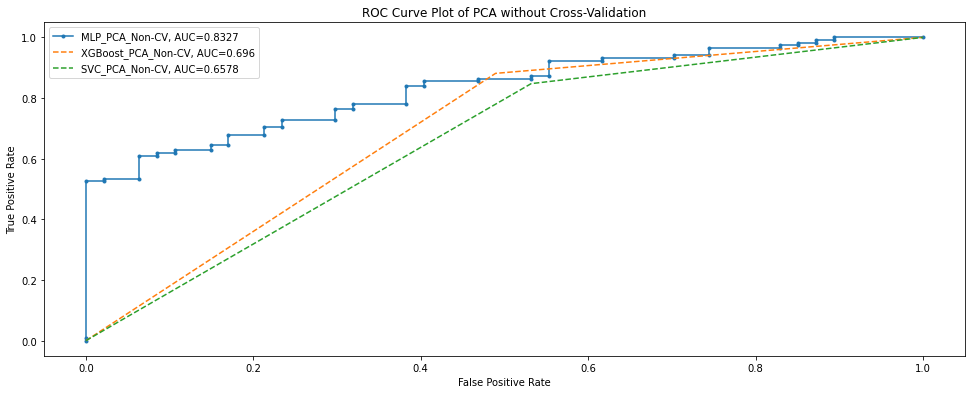

In [ ]:
plt.gcf().set_size_inches(16.5, 13.5)
plt.subplot(211)
plt.plot(fpr_mlp,tpr_mlp,marker='.',label="MLP_PCA_Non-CV, AUC="+str(auc_mlp))
plt.subplot(211)
plt.plot(fpr_xgb,tpr_xgb,linestyle='--',label="XGBoost_PCA_Non-CV, AUC="+str(auc_xgb))
plt.subplot(211)
plt.plot(fpr_svc,tpr_svc,linestyle='--',label="SVC_PCA_Non-CV, AUC="+str(auc_svc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve Plot of PCA without Cross-Validation")
plt.legend()

## Training Models with PCA X Imputed by Regressor Model and with Cross Validation

In [ ]:

# K-fold Cross Validation model evaluation
acc_per_fold=[]
loss_per_fold=[]
inputs =np.array(X_reduced)
targets = np.array(y)
kfold = KFold(n_splits=3, shuffle=True)
fold_no = 1
for train, test in kfold.split(inputs, targets):

  # Define the model architecture
  model = Sequential()
  model.add(Dense(58, activation='relu', input_dim=(56)))
  model.add(Dense(60, activation='relu'))
  model.add(Dense(num_classes, activation='sigmoid'))

  # Compile the model
  model.compile(loss='binary_crossentropy',
              optimizer='RMSprop',
              metrics=['accuracy'])


  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  # Fit data to model
  history = model.fit(inputs[train], targets[train],
              batch_size=batch_size,
              epochs=epochs,
              verbose=0)
  # Generate generalization metrics
  scores = model.evaluate(inputs[test], targets[test], verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  # Increase fold number
  fold_no = fold_no + 1
y_pred=np.round(model.predict(inputs[test])).ravel()
print("\nCR by library method=\n",
          classification_report(targets[test], y_pred))

------------------------------------------------------------------------
Training for fold 1 ...
Score for fold 1: loss of 0.7082468271255493; accuracy of 75.90909004211426%
------------------------------------------------------------------------
Training for fold 2 ...
Score for fold 2: loss of 0.5655208826065063; accuracy of 78.99543642997742%
------------------------------------------------------------------------
Training for fold 3 ...
Score for fold 3: loss of 0.7324817180633545; accuracy of 78.53881120681763%

CR by library method=
               precision    recall  f1-score   support

           0       0.58      0.66      0.62        58
           1       0.87      0.83      0.85       161

    accuracy                           0.79       219
   macro avg       0.73      0.74      0.73       219
weighted avg       0.79      0.79      0.79       219



In [ ]:
# filename = '/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/2-exp/Regressor/MLP/PCA_Cross_Validation/MLP_PCA_Cross_Validation.sav'
# pickle.dump(model, open(filename, 'wb')) 


In [ ]:
loaded_model = pickle.load(open('/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/2-exp/Regressor/MLP/PCA_Cross_Validation/MLP_PCA_Cross_Validation.sav', 'rb'))
y_pred = loaded_model.predict(Xtest)
fpr_mlp, tpr_mlp, _ = metrics.roc_curve(Ytest, y_pred)
auc_mlp = round(metrics.roc_auc_score(Ytest, y_pred), 4)

In [ ]:
y_pred=np.round(loaded_model.predict(inputs[test])).ravel()
print("\nCR by library method=\n",
          classification_report(targets[test], y_pred))


CR by library method=
               precision    recall  f1-score   support

           0       0.86      0.86      0.86        58
           1       0.95      0.95      0.95       161

    accuracy                           0.93       219
   macro avg       0.91      0.91      0.91       219
weighted avg       0.93      0.93      0.93       219



In [ ]:
MLP_Regressor_imputed_PCA_Cross_Validation_AUC=metrics.roc_auc_score(targets[test], y_pred)
MLP_Regressor_imputed_PCA_Cross_Validation_AUC

0.9061897622617262

XGB boost with K-fold cross validation

In [ ]:
# cv = KFold(n_splits=3)
# PARAMETERS = {"subsample":[0.5, 0.75, 1],
#               "colsample_bytree":[0.5, 0.75, 1],
#               "max_depth":[2,5, 6, 12],
#               "min_child_weight":[1,5,15],
#               "learning_rate":[0.3, 0.1, 0.03],
#               "n_estimators":[100,500,1000]}
# full = xgb.XGBClassifier(n_estimators=100, n_jobs=-1)
# model_gs = GridSearchCV(full,param_grid=PARAMETERS,cv=cv,scoring="accuracy")
# model_gs.fit(Xtrain,Ytrain, eval_metric="error",verbose=0)
# y_pred=model_gs.predict(Xtest)
# print("The accuracy is %.2f"%(accuracy_score(y_pred,Ytest)*100),"%")

In [ ]:
# filename = '/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/2-exp/Regressor/XGB/PCA_Cross_Validation/XGB_PCA_Cross_Validation.sav'
# pickle.dump(model_gs, open(filename, 'wb')) 


In [ ]:
loaded_model = pickle.load(open('/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/2-exp/Regressor/XGB/PCA_Cross_Validation/XGB_PCA_Cross_Validation.sav', 'rb'))
y_pred = loaded_model.predict(Xtest)
fpr_xgb, tpr_xgb, _ = metrics.roc_curve(Ytest, y_pred)
auc_xgb= round(metrics.roc_auc_score(Ytest, y_pred), 4)


In [ ]:
y_pred=np.round(loaded_model.predict(Xtest)).ravel()
print("\nCR by library method=\n",
          classification_report(Ytest, y_pred))


CR by library method=
               precision    recall  f1-score   support

           0       0.58      0.45      0.51        47
           1       0.80      0.87      0.83       118

    accuracy                           0.75       165
   macro avg       0.69      0.66      0.67       165
weighted avg       0.74      0.75      0.74       165



In [ ]:
XGBoost_Regressor_imputed_PCA_Cross_Validation_accuracy=float(classification_report(Ytest, y_pred).split()[15])
XGBoost_Regressor_imputed_PCA_Cross_Validation_accuracy

0.75

Support Vector Machine with cross validation

In [ ]:
# tuned_parameters =  [{'kernel': ['rbf'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
#                      'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]},
#                     {'kernel': ['sigmoid'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
#                      'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000] },{'kernel': ['linear'], 'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]}] 
# clf = GridSearchCV(SVC(), tuned_parameters, cv=cv,
#                        scoring='accuracy')
# clf.fit(Xtrain,Ytrain)
# y_pred=clf.predict(Xtest)
# print("The accuracy is %.2f"%(accuracy_score(y_pred,Ytest)*100),"%")

In [ ]:
# filename = '/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/2-exp/Regressor/SVM/PCA_Cross_Validation/SVM_PCA_Cross_Validation.sav'
# pickle.dump(clf, open(filename, 'wb')) 


In [ ]:
loaded_model = pickle.load(open('/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/2-exp/Regressor/SVM/PCA_Cross_Validation/SVM_PCA_Cross_Validation.sav', 'rb'))
y_pred = loaded_model.predict(Xtest)
fpr_svc, tpr_svc, _ = metrics.roc_curve(Ytest, y_pred)
auc_svc = round(metrics.roc_auc_score(Ytest, y_pred), 4)

In [ ]:
y_pred=np.round(loaded_model.predict(Xtest)).ravel()
print("\nCR by library method=\n",
          classification_report(Ytest, y_pred))


CR by library method=
               precision    recall  f1-score   support

           0       0.60      0.62      0.61        47
           1       0.85      0.84      0.84       118

    accuracy                           0.78       165
   macro avg       0.73      0.73      0.73       165
weighted avg       0.78      0.78      0.78       165



In [ ]:
SVC_Regressor_imputed_PCA_Cross_Validation_accuracy=float(classification_report(Ytest, y_pred).split()[15])
SVC_Regressor_imputed_PCA_Cross_Validation_accuracy

0.78

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


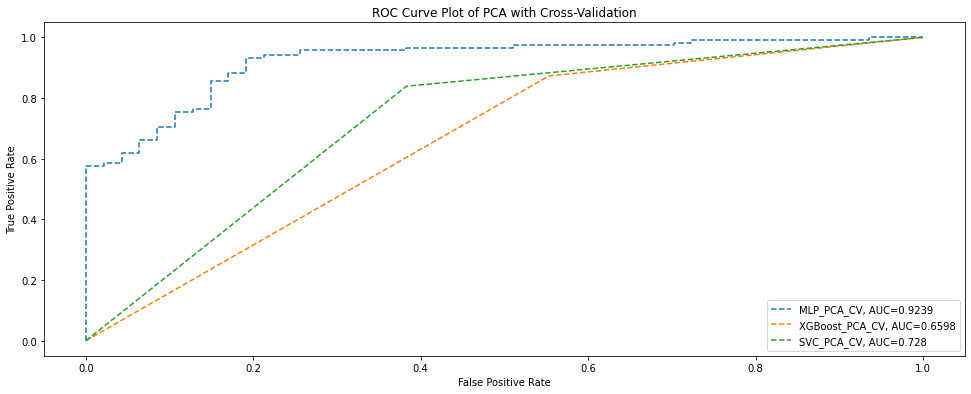

In [ ]:
plt.gcf().set_size_inches(16.5, 13.5)
plt.subplot(211)
plt.plot(fpr_mlp,tpr_mlp,linestyle='--',label="MLP_PCA_CV, AUC="+str(auc_mlp))
plt.subplot(211)
plt.plot(fpr_xgb,tpr_xgb,linestyle='--',label="XGBoost_PCA_CV, AUC="+str(auc_xgb))
plt.subplot(211)
plt.plot(fpr_svc,tpr_svc,linestyle='--',label="SVC_PCA_CV, AUC="+str(auc_svc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve Plot of PCA with Cross-Validation")
plt.legend()

# Training Models with Non-PCA X Imputed by Regressor Model and without Cross Validation

In [ ]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,y,random_state=42,stratify=y)

In [ ]:
# m = Sequential()
# m.add(Dense(216, activation='relu', input_dim=(214)))
# m.add(Dense(218, activation='relu'))
# # m.add(Dense(128, activation='relu'))
# # m.add(Dense(64, activation='relu'))
# m.add(Dense(num_classes, activation='sigmoid'))

In [ ]:
# m.compile(loss='binary_crossentropy',
#               optimizer='RMSprop',
#               metrics=['accuracy'])
# history = m.fit(Xtrain, Ytrain,batch_size=batch_size,epochs=epochs,verbose=0,
#                     validation_data=(Xtest, Ytest))

In [ ]:
# loss,accuracy=m.evaluate(Xtest,Ytest)
# print("Accuracy: %.2f"%(accuracy*100),"%")

In [ ]:
# filename = '/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/2-exp/Regressor/MLP/Non_PCA_Without_Cross_Validation/MLP_Non_PCA_Without_Cross_Validation.sav'
# pickle.dump(m, open(filename, 'wb')) 


In [ ]:
loaded_model = pickle.load(open('/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/2-exp/Regressor/MLP/Non_PCA_Without_Cross_Validation/MLP_Non_PCA_Without_Cross_Validation.sav', 'rb'))
y_pred = loaded_model.predict(Xtest)
fpr_mlp, tpr_mlp, _ = metrics.roc_curve(Ytest, y_pred)
auc_mlp = round(metrics.roc_auc_score(Ytest, y_pred), 4)

In [ ]:
y_pred=np.round(loaded_model.predict(Xtest)).ravel()
print("\nCR by library method=\n",
          classification_report(Ytest, y_pred))


CR by library method=
               precision    recall  f1-score   support

           0       0.62      0.62      0.62        47
           1       0.85      0.85      0.85       118

    accuracy                           0.78       165
   macro avg       0.73      0.73      0.73       165
weighted avg       0.78      0.78      0.78       165



In [ ]:
MLP_Regressor_imputed_Non_PCA_Non_Cross_accuracy=float(classification_report(Ytest, y_pred).split()[15])
MLP_Regressor_imputed_Non_PCA_Non_Cross_accuracy

0.78

XGB boost without K-fold cross validation


In [ ]:
# full_boost=xgb.XGBClassifier(learning_rate =0.1,
#  n_estimators=1000,
#  max_depth=5,
#  min_child_weight=1,
#  gamma=0,
#  subsample=0.8,
#  colsample_bytree=0.8,
#  objective= 'binary:logistic',
#  nthread=4,
#  scale_pos_weight=1,
#  seed=27)
# full_boost.fit(np.array(Xtrain), Ytrain)
# y_pred=full_boost.predict(np.array(Xtest))
# print("The accuracy is %.2f"%(accuracy_score(y_pred,Ytest)*100),"%")

In [ ]:
# filename = '/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/2-exp/Regressor/XGB/Non_PCA_Without_Cross_Validation/XGB_Non_PCA_Without_Cross_Validation.sav' 
# pickle.dump(full_boost, open(filename, 'wb')) 


In [ ]:
loadedmodel = pickle.load(open('/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/2-exp/Regressor/XGB/Non_PCA_Without_Cross_Validation/XGB_Non_PCA_Without_Cross_Validation.sav', 'rb'))
y_pred = loadedmodel.predict(np.array(Xtest))
fpr_xgb, tpr_xgb, _ = metrics.roc_curve(Ytest, y_pred)
auc_xgb = round(metrics.roc_auc_score(Ytest, y_pred), 4)


In [ ]:
y_pred=np.round(loadedmodel.predict(np.array(Xtest))).ravel()
print("\nCR by library method=\n",
          classification_report(Ytest, y_pred))


CR by library method=
               precision    recall  f1-score   support

           0       0.55      0.51      0.53        47
           1       0.81      0.83      0.82       118

    accuracy                           0.74       165
   macro avg       0.68      0.67      0.67       165
weighted avg       0.73      0.74      0.74       165



In [ ]:
XGBoost_Regressor_imputed_Non_PCA_Non_Cross_accuracy=float(classification_report(Ytest, y_pred).split()[15])
XGBoost_Regressor_imputed_Non_PCA_Non_Cross_accuracy

0.74

In [ ]:
Xtest.shape

(165, 214)

Support Vector Machine with cross validation

In [ ]:
# clf=SVC()
# clf.fit(Xtrain,Ytrain)
# y_pred=clf.predict(Xtest)
# print("The accuracy is %.2f"%(accuracy_score(y_pred,Ytest)*100),"%")

In [ ]:
# filename = '/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/2-exp/Regressor/SVM/Non_PCA_Without_Cross_Validation/SVM_Non_PCA_Without_Cross_Validation.sav'
# pickle.dump(clf, open(filename, 'wb')) 


In [ ]:
loaded_model = pickle.load(open('/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/2-exp/Regressor/SVM/Non_PCA_Without_Cross_Validation/SVM_Non_PCA_Without_Cross_Validation.sav', 'rb'))
y_pred = loaded_model.predict(Xtest)
fpr_svc, tpr_svc, _ = metrics.roc_curve(Ytest, y_pred)
auc_svc = round(metrics.roc_auc_score(Ytest, y_pred), 4)

In [ ]:
y_pred=np.round(loaded_model.predict(Xtest)).ravel()
print("\nCR by library method=\n",
          classification_report(Ytest, y_pred))


CR by library method=
               precision    recall  f1-score   support

           0       0.59      0.51      0.55        47
           1       0.81      0.86      0.83       118

    accuracy                           0.76       165
   macro avg       0.70      0.68      0.69       165
weighted avg       0.75      0.76      0.75       165



In [ ]:
SVC_Regressor_imputed_Non_PCA_Non_Cross_accuracy=float(classification_report(Ytest, y_pred).split()[15])
SVC_Regressor_imputed_Non_PCA_Non_Cross_accuracy

0.76

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


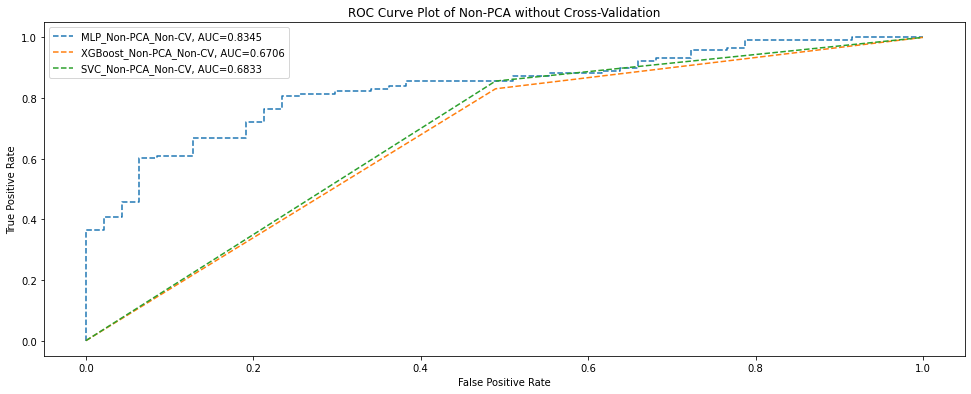

In [ ]:
plt.gcf().set_size_inches(16.5, 13.5)
plt.subplot(211)
plt.plot(fpr_mlp,tpr_mlp, linestyle='--',label="MLP_Non-PCA_Non-CV, AUC="+str(auc_mlp))
plt.subplot(211)
plt.plot(fpr_xgb,tpr_xgb, linestyle='--',label="XGBoost_Non-PCA_Non-CV, AUC="+str(auc_xgb))
plt.subplot(211)
plt.plot(fpr_svc,tpr_svc, linestyle='--',label="SVC_Non-PCA_Non-CV, AUC="+str(auc_svc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve Plot of Non-PCA without Cross-Validation")
plt.legend()

## Training Models with Non-PCA X Imputed by Regressor Model and with Cross Validation

In [ ]:

# K-fold Cross Validation model evaluation
acc_per_fold=[]
loss_per_fold=[]
inputs =np.array(X)
targets = np.array(y)
kfold = KFold(n_splits=3, shuffle=True)
fold_no = 1
for train, test in kfold.split(inputs, targets):

  # Define the model architecture
  model = Sequential()
  model.add(Dense(216, activation='relu', input_dim=(214)))
  model.add(Dense(218, activation='relu'))
  model.add(Dense(num_classes, activation='sigmoid'))

  # Compile the model
  model.compile(loss='binary_crossentropy',
              optimizer='RMSprop',
              metrics=['accuracy'])


  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  # Fit data to model
  history = model.fit(inputs[train], targets[train],
              batch_size=batch_size,
              epochs=epochs,
              verbose=0)
  # Generate generalization metrics
  scores = model.evaluate(inputs[test], targets[test], verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  # Increase fold number
  fold_no = fold_no + 1
y_pred=np.round(model.predict(inputs[test])).ravel()
print("\nCR by library method=\n",
          classification_report(targets[test], y_pred))

------------------------------------------------------------------------
Training for fold 1 ...
Score for fold 1: loss of 0.6136958003044128; accuracy of 82.27272629737854%
------------------------------------------------------------------------
Training for fold 2 ...
Score for fold 2: loss of 0.8867802023887634; accuracy of 76.7123281955719%
------------------------------------------------------------------------
Training for fold 3 ...
Score for fold 3: loss of 0.821671187877655; accuracy of 76.7123281955719%

CR by library method=
               precision    recall  f1-score   support

           0       0.64      0.47      0.54        64
           1       0.80      0.89      0.84       155

    accuracy                           0.77       219
   macro avg       0.72      0.68      0.69       219
weighted avg       0.75      0.77      0.76       219



In [ ]:
# filename = '/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/2-exp/Regressor/MLP/Non_PCA_Cross_Validation/MLP_Non_PCA_Cross_Validation.sav'
# pickle.dump(model, open(filename, 'wb')) 


In [ ]:
loaded_model = pickle.load(open('/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/2-exp/Regressor/MLP/Non_PCA_Cross_Validation/MLP_Non_PCA_Cross_Validation.sav', 'rb'))
y_pred = loaded_model.predict(Xtest)
fpr_mlp, tpr_mlp, _ = metrics.roc_curve(Ytest, y_pred)
auc_mlp = round(metrics.roc_auc_score(Ytest, y_pred), 4)

In [ ]:
y_pred=np.round(loaded_model.predict(inputs[test])).ravel()
print("\nCR by library method=\n",
          classification_report(targets[test], y_pred))


CR by library method=
               precision    recall  f1-score   support

           0       0.89      0.84      0.86        64
           1       0.94      0.95      0.95       155

    accuracy                           0.92       219
   macro avg       0.91      0.90      0.90       219
weighted avg       0.92      0.92      0.92       219



In [ ]:
MLP_Regressor_imputed_Non_PCA_Cross_Validation_accuracy=float((classification_report(targets[test], y_pred)).split()[15])
MLP_Regressor_imputed_Non_PCA_Cross_Validation_accuracy

0.92

XGB boost with K-fold cross validation

In [ ]:
# cv = KFold(n_splits=2)
# PARAMETERS = {"subsample":[0.5, 0.75, 1],
#               "colsample_bytree":[0.5, 0.75, 1],
#               "max_depth":[2,5, 6, 12],
#               "min_child_weight":[1,5,15],
#               "learning_rate":[0.3, 0.1, 0.03],
#               "n_estimators":[100,500,1000]}
# full = xgb.XGBClassifier(n_estimators=100, n_jobs=-1)
# model_gs = GridSearchCV(full,param_grid=PARAMETERS,cv=cv,scoring="accuracy")
# model_gs.fit(np.array(Xtrain),Ytrain, eval_metric="error",verbose=0)
# y_pred=model_gs.predict(np.array(Xtest))
# print("The accuracy is %.2f"%(accuracy_score(y_pred,Ytest)*100),"%")

In [ ]:
# filename = '/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/2-exp/Regressor/XGB/Non_PCA_Cross_Validation/XGB_Non_PCA_Cross_Validation.sav'
# pickle.dump(model_gs, open(filename, 'wb')) 


In [ ]:
loadedmodel = pickle.load(open('/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/2-exp/Regressor/XGB/Non_PCA_Cross_Validation/XGB_Non_PCA_Cross_Validation.sav', 'rb'))
y_pred = loadedmodel.predict(np.array(Xtest))
fpr_xgb, tpr_xgb, _ = metrics.roc_curve(Ytest, y_pred)
auc_xgb = round(metrics.roc_auc_score(Ytest, y_pred), 4)

In [ ]:
y_pred=np.round(loadedmodel.predict(np.array(Xtest))).ravel()
print("\nCR by library method=\n",
          classification_report(Ytest, y_pred))


CR by library method=
               precision    recall  f1-score   support

           0       0.54      0.45      0.49        47
           1       0.79      0.85      0.82       118

    accuracy                           0.73       165
   macro avg       0.67      0.65      0.65       165
weighted avg       0.72      0.73      0.73       165



In [ ]:
XGBoost_Regressor_imputed_Non_PCA_Cross_Validation_accuracy=float(classification_report(Ytest, y_pred).split()[15])
XGBoost_Regressor_imputed_Non_PCA_Cross_Validation_accuracy

0.73

Support Vector Machine with cross validation

In [ ]:
# tuned_parameters =  [{'kernel': ['rbf'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
#                      'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]},
#                     {'kernel': ['sigmoid'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
#                      'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000] },{'kernel': ['linear'], 'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]}] 
# clf = GridSearchCV(SVC(), tuned_parameters, cv=cv,
#                        scoring='accuracy')
# clf.fit(Xtrain,Ytrain)
# y_pred=clf.predict(Xtest)
# print("The accuracy is %.2f"%(accuracy_score(y_pred,Ytest)*100),"%")

In [ ]:
# filename = '/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/2-exp/Regressor/SVM/Non_PCA_Cross_Validation/SVM_Non_PCA_Cross_Validation.sav'
# pickle.dump(clf, open(filename, 'wb')) 


In [ ]:
loaded_model = pickle.load(open('/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/2-exp/Regressor/SVM/Non_PCA_Cross_Validation/SVM_Non_PCA_Cross_Validation.sav', 'rb'))
y_pred = loaded_model.predict(Xtest)
fpr_svc, tpr_svc, _ = metrics.roc_curve(Ytest, y_pred)
auc_svc = round(metrics.roc_auc_score(Ytest, y_pred), 4)

In [ ]:
y_pred=np.round(loaded_model.predict(Xtest)).ravel()
print("\nCR by library method=\n",
          classification_report(Ytest, y_pred))


CR by library method=
               precision    recall  f1-score   support

           0       0.60      0.51      0.55        47
           1       0.82      0.86      0.84       118

    accuracy                           0.76       165
   macro avg       0.71      0.69      0.70       165
weighted avg       0.75      0.76      0.76       165



In [ ]:
SVC_Regressor_imputed_Non_PCA_Cross_Validation_accuracy=float(classification_report(Ytest, y_pred).split()[15])
SVC_Regressor_imputed_Non_PCA_Cross_Validation_accuracy

0.76

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


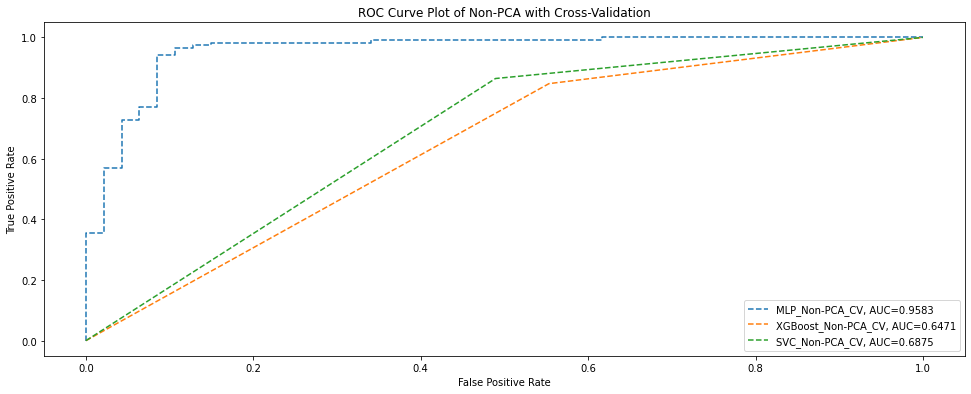

In [ ]:
plt.gcf().set_size_inches(16.5, 13.5)
plt.subplot(211)
plt.plot(fpr_mlp,tpr_mlp, linestyle='--',label="MLP_Non-PCA_CV, AUC="+str(auc_mlp))
plt.subplot(211)
plt.plot(fpr_xgb,tpr_xgb, linestyle='--',label="XGBoost_Non-PCA_CV, AUC="+str(auc_xgb))
plt.subplot(211)
plt.plot(fpr_svc,tpr_svc, linestyle='--',label="SVC_Non-PCA_CV, AUC="+str(auc_svc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve Plot of Non-PCA with Cross-Validation")
plt.legend()

### Joining and Scaling Data Imputed by the Multivariate Imputation method


In [ ]:
multivariate_scaled=StandardScaler().fit_transform(num_df)
multivariate_imputed_df=pd.DataFrame(multivariate_scaled, columns=numeric_data.columns)

In [ ]:
data=pd.concat([multivariate_imputed_df,objects], axis=1)


In [ ]:
y=data['DEATH?']
X=data.iloc[:,:-1]

In [ ]:
pca = PCA()
pca.fit(X)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X)

In [ ]:
# number of components
n_pcs= pca.components_.shape[0]

# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]

initial_feature_names = X.columns
# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

# LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}

# build the dataframe
df = pd.DataFrame(dic.items())

In [ ]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X_reduced,y,random_state=42,stratify=y)

In [ ]:
X_reduced.shape

(658, 56)

## Training Models with PCA X Imputed by Multivariate Method and without Cross Validation

In [ ]:
# model = Sequential()
# model.add(Dense(58, activation='relu', input_dim=(56)))
# model.add(Dense(60, activation='relu'))
# # model.add(Dense(128, activation='relu'))
# # model.add(Dense(64, activation='relu'))
# model.add(Dense(num_classes, activation='sigmoid'))

In [ ]:
# model.compile(loss='binary_crossentropy',
#               optimizer='RMSprop',
#               metrics=['accuracy'])
# history = model.fit(Xtrain, Ytrain,batch_size=batch_size,epochs=epochs,verbose=0,
#                     validation_data=(Xtest, Ytest))

In [ ]:
# loss,accuracy=model.evaluate(Xtest,Ytest)
# print("Accuracy: %.2f"%(accuracy*100),"%")

In [ ]:
# filename = '/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/2-exp/Multivariate/MLP/PCA_Without_Cross_Validation/MLP_PCA_Without_Cross_Validation.sav'
# pickle.dump(model, open(filename, 'wb')) 


In [ ]:
loaded_model = pickle.load(open('/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/2-exp/Multivariate/MLP/PCA_Without_Cross_Validation/MLP_PCA_Without_Cross_Validation.sav', 'rb'))
y_pred = loaded_model.predict(Xtest)
fpr_mlp, tpr_mlp, _ = metrics.roc_curve(Ytest, y_pred)
auc_mlp = round(metrics.roc_auc_score(Ytest, y_pred), 4)

In [ ]:
y_pred=np.round(loaded_model.predict(Xtest)).ravel()
print("\nCR by library method=\n",
          classification_report(Ytest, y_pred))


CR by library method=
               precision    recall  f1-score   support

           0       0.62      0.55      0.58        47
           1       0.83      0.86      0.85       118

    accuracy                           0.78       165
   macro avg       0.72      0.71      0.72       165
weighted avg       0.77      0.78      0.77       165



In [ ]:
MLP_Multivariate_imputed_PCA_Non_Cross_accuracy=float(classification_report(Ytest, y_pred).split()[15])
MLP_Multivariate_imputed_PCA_Non_Cross_accuracy

0.78

In [ ]:
# model=xgb.XGBClassifier(learning_rate =0.1,
#  n_estimators=1000,
#  max_depth=5,
#  min_child_weight=1,
#  gamma=0,
#  subsample=0.8,
#  colsample_bytree=0.8,
#  objective= 'binary:logistic',
#  nthread=4,
#  scale_pos_weight=1,
#  seed=27)


In [ ]:
# model.fit(Xtrain, Ytrain)

In [ ]:
# y_pred=model.predict(Xtest)
# print("The accuracy is %.2f"%(accuracy_score(y_pred,Ytest)*100),"%")

In [ ]:
# filename = '/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/2-exp/Multivariate/XGB/PCA_Without_Cross_Validation/XGB_PCA_Without_Cross_Validation.sav'
# pickle.dump(model, open(filename, 'wb')) 

In [ ]:
loaded_model = pickle.load(open('/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/2-exp/Multivariate/XGB/PCA_Without_Cross_Validation/XGB_PCA_Without_Cross_Validation.sav', 'rb'))
y_pred = loaded_model.predict(Xtest)
fpr_xgb, tpr_xgb, _ = metrics.roc_curve(Ytest, y_pred)
auc_xgb = round(metrics.roc_auc_score(Ytest, y_pred), 4)


In [ ]:
y_pred=np.round(loaded_model.predict(Xtest)).ravel()
print("\nCR by library method=\n",
          classification_report(Ytest, y_pred))


CR by library method=
               precision    recall  f1-score   support

           0       0.63      0.51      0.56        47
           1       0.82      0.88      0.85       118

    accuracy                           0.78       165
   macro avg       0.73      0.70      0.71       165
weighted avg       0.77      0.78      0.77       165



In [ ]:
XGBoost_Multivariate_imputed_PCA_accuracy=float(classification_report(Ytest, y_pred).split()[15])
XGBoost_Multivariate_imputed_PCA_accuracy

0.78

In [ ]:
# clf=SVC()
# clf.fit(Xtrain,Ytrain)
# y_pred=clf.predict(Xtest)
# print("The accuracy is %.2f"%(accuracy_score(y_pred,Ytest)*100),"%")

In [ ]:
# filename = '/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/2-exp/Multivariate/SVM/PCA_Without_Cross_Validation/SVM_PCA_Without_Cross_Validation.sav'
# pickle.dump(clf, open(filename, 'wb')) 


In [ ]:
loaded_model = pickle.load(open('/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/2-exp/Multivariate/SVM/PCA_Without_Cross_Validation/SVM_PCA_Without_Cross_Validation.sav', 'rb'))
y_pred = loaded_model.predict(Xtest)
fpr_svc, tpr_svc, _ = metrics.roc_curve(Ytest, y_pred)
auc_svc = round(metrics.roc_auc_score(Ytest, y_pred), 4)


In [ ]:
y_pred=np.round(loaded_model.predict(Xtest)).ravel()
print("\nCR by library method=\n",
          classification_report(Ytest, y_pred))


CR by library method=
               precision    recall  f1-score   support

           0       0.55      0.47      0.51        47
           1       0.80      0.85      0.82       118

    accuracy                           0.74       165
   macro avg       0.68      0.66      0.66       165
weighted avg       0.73      0.74      0.73       165



In [ ]:
SVC_Multivariate_imputed_PCA_accuracy=float(classification_report(Ytest, y_pred).split()[15])
SVC_Multivariate_imputed_PCA_accuracy

0.74

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


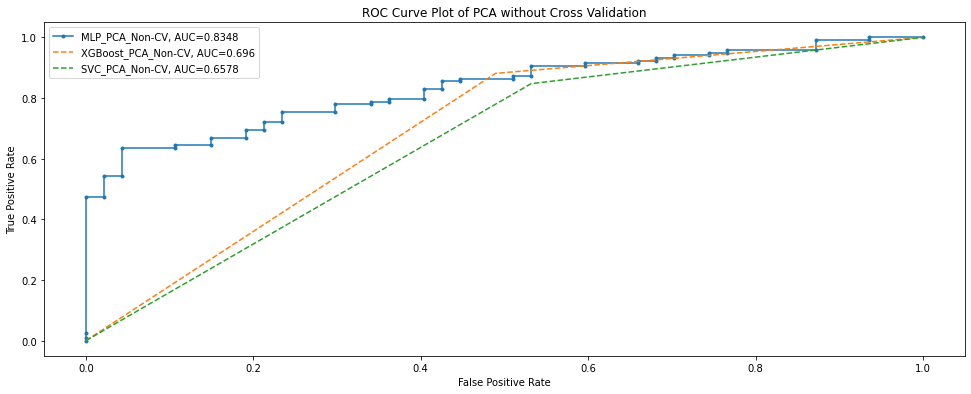

In [ ]:
plt.gcf().set_size_inches(16.5, 13.5)
plt.subplot(211)
plt.plot(fpr_mlp,tpr_mlp,marker='.',label="MLP_PCA_Non-CV, AUC="+str(auc_mlp))
plt.subplot(211)
plt.plot(fpr_xgb,tpr_xgb,linestyle='--',label="XGBoost_PCA_Non-CV, AUC="+str(auc_xgb))
plt.subplot(211)
plt.plot(fpr_svc,tpr_svc,linestyle='--',label="SVC_PCA_Non-CV, AUC="+str(auc_svc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve Plot of PCA without Cross Validation")
plt.legend()

## Training Models with PCA X Imputed by Multivariate Model and with Cross Validation

In [ ]:

# K-fold Cross Validation model evaluation
acc_per_fold=[]
loss_per_fold=[]
inputs =np.array(X_reduced)
targets = np.array(y)
kfold = KFold(n_splits=3, shuffle=True)
fold_no = 1
for train, test in kfold.split(inputs, targets):

  # Define the model architecture
  model = Sequential()
  model.add(Dense(58, activation='relu', input_dim=(56)))
  model.add(Dense(60, activation='relu'))
  model.add(Dense(num_classes, activation='sigmoid'))

  # Compile the model
  model.compile(loss='binary_crossentropy',
              optimizer='RMSprop',
              metrics=['accuracy'])


  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  # Fit data to model
  history = model.fit(inputs[train], targets[train],
              batch_size=batch_size,
              epochs=epochs,
              verbose=0)
  # Generate generalization metrics
  scores = model.evaluate(inputs[test], targets[test], verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  # Increase fold number
  fold_no = fold_no + 1
y_pred=np.round(model.predict(inputs[test])).ravel()
print("\nCR by library method=\n",
          classification_report(targets[test], y_pred))

------------------------------------------------------------------------
Training for fold 1 ...
Score for fold 1: loss of 0.6174365878105164; accuracy of 78.63636612892151%
------------------------------------------------------------------------
Training for fold 2 ...
Score for fold 2: loss of 0.5818538665771484; accuracy of 77.16894745826721%
------------------------------------------------------------------------
Training for fold 3 ...
Score for fold 3: loss of 0.5662097930908203; accuracy of 78.53881120681763%

CR by library method=
               precision    recall  f1-score   support

           0       0.61      0.58      0.59        59
           1       0.85      0.86      0.85       160

    accuracy                           0.79       219
   macro avg       0.73      0.72      0.72       219
weighted avg       0.78      0.79      0.78       219



In [ ]:
# filename = '/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/2-exp/Multivariate/MLP/PCA_Cross_Validation/MLP_PCA_Cross_Validation.sav'
# pickle.dump(model, open(filename, 'wb')) 


In [ ]:
loaded_model = pickle.load(open('/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/2-exp/Multivariate/MLP/PCA_Cross_Validation/MLP_PCA_Cross_Validation.sav', 'rb'))
y_pred = loaded_model.predict(Xtest)
fpr_mlp, tpr_mlp, _ = metrics.roc_curve(Ytest, y_pred)
auc_mlp = round(metrics.roc_auc_score(Ytest, y_pred), 4)

In [ ]:
y_pred=np.round(loaded_model.predict(inputs[test])).ravel()
print("\nCR by library method=\n",
          classification_report(targets[test], y_pred))


CR by library method=
               precision    recall  f1-score   support

           0       0.93      0.90      0.91        59
           1       0.96      0.97      0.97       160

    accuracy                           0.95       219
   macro avg       0.95      0.94      0.94       219
weighted avg       0.95      0.95      0.95       219



In [ ]:
MLP_Multivariate_imputed_PCA_Cross_Validation_accuracy=float((classification_report(targets[test], y_pred)).split()[15])
MLP_Multivariate_imputed_PCA_Cross_Validation_accuracy

0.95

In [ ]:
# cv = KFold(n_splits=3)
# PARAMETERS = {"subsample":[0.5, 0.75, 1],
#               "colsample_bytree":[0.5, 0.75, 1],
#               "max_depth":[2,5, 6, 12],
#               "min_child_weight":[1,5,15],
#               "learning_rate":[0.3, 0.1, 0.03],
#               "n_estimators":[100,500,1000]}
# full = xgb.XGBClassifier(n_estimators=100, n_jobs=-1)
# model_gs = GridSearchCV(full,param_grid=PARAMETERS,cv=cv,scoring="accuracy")
# model_gs.fit(Xtrain,Ytrain, eval_metric="error",verbose=0)
# y_pred=model_gs.predict(Xtest)
# print("The accuracy is %.2f"%(accuracy_score(y_pred,Ytest)*100),"%")

In [ ]:
# filename = '/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/2-exp/Multivariate/XGB/PCA_Cross_Validation/XGB_PCA_Cross_Validation.sav'
# pickle.dump(model_gs, open(filename, 'wb')) 


In [ ]:
loaded_model = pickle.load(open('/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/2-exp/Multivariate/XGB/PCA_Cross_Validation/XGB_PCA_Cross_Validation.sav', 'rb'))
y_pred = loaded_model.predict(Xtest)
fpr_xgb, tpr_xgb, _ = metrics.roc_curve(Ytest, y_pred)
auc_xgb= round(metrics.roc_auc_score(Ytest, y_pred), 4)


In [ ]:
y_pred=np.round(loaded_model.predict(Xtest)).ravel()
print("\nCR by library method=\n",
          classification_report(Ytest, y_pred))


CR by library method=
               precision    recall  f1-score   support

           0       0.58      0.45      0.51        47
           1       0.80      0.87      0.83       118

    accuracy                           0.75       165
   macro avg       0.69      0.66      0.67       165
weighted avg       0.74      0.75      0.74       165



In [ ]:
XGBoost_Multivariate_imputed_PCA_Cross_Validation_accuracy=float(classification_report(Ytest, y_pred).split()[15])
XGBoost_Multivariate_imputed_PCA_Cross_Validation_accuracy

0.75

In [ ]:
# cv = KFold(n_splits=3)

# tuned_parameters =  [{'kernel': ['rbf'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
#                      'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]},
#                     {'kernel': ['sigmoid'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
#                      'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000] },{'kernel': ['linear'], 'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]}] 
# clf = GridSearchCV(SVC(), tuned_parameters, cv=cv,
#                        scoring='accuracy')
# clf.fit(Xtrain,Ytrain)
# y_pred=clf.predict(Xtest)
# print("The accuracy is %.2f"%(accuracy_score(y_pred,Ytest)*100),"%")

In [ ]:
# filename = '/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/2-exp/Multivariate/SVM/PCA_Cross_Validation/SVM_PCA_Cross_Validation.sav'
# pickle.dump(clf, open(filename, 'wb')) 

In [ ]:
loaded_model = pickle.load(open('/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/2-exp/Multivariate/SVM/PCA_Cross_Validation/SVM_PCA_Cross_Validation.sav', 'rb'))
y_pred = loaded_model.predict(Xtest)
fpr_svc, tpr_svc, _ = metrics.roc_curve(Ytest, y_pred)
auc_svc = round(metrics.roc_auc_score(Ytest, y_pred), 4)

In [ ]:
y_pred=np.round(loaded_model.predict(Xtest)).ravel()
print("\nCR by library method=\n",
          classification_report(Ytest, y_pred))


CR by library method=
               precision    recall  f1-score   support

           0       0.60      0.62      0.61        47
           1       0.85      0.84      0.84       118

    accuracy                           0.78       165
   macro avg       0.73      0.73      0.73       165
weighted avg       0.78      0.78      0.78       165



In [ ]:
SVC_Multivariate_imputed_PCA_Cross_Validation_accuracy=float(classification_report(Ytest, y_pred).split()[15])
SVC_Multivariate_imputed_PCA_Cross_Validation_accuracy

0.78

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


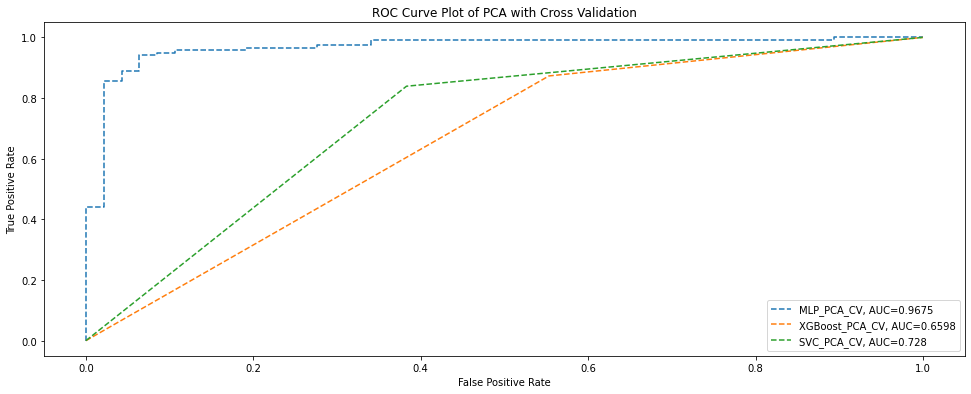

In [ ]:
plt.gcf().set_size_inches(16.5, 13.5)
plt.subplot(211)
plt.plot(fpr_mlp,tpr_mlp,linestyle='--',label="MLP_PCA_CV, AUC="+str(auc_mlp))
plt.subplot(211)
plt.plot(fpr_xgb,tpr_xgb,linestyle='--',label="XGBoost_PCA_CV, AUC="+str(auc_xgb))
plt.subplot(211)
plt.plot(fpr_svc,tpr_svc,linestyle='--',label="SVC_PCA_CV, AUC="+str(auc_svc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve Plot of PCA with Cross Validation")
plt.legend()

## Training Models with Non-PCA X Imputed by Multivariate Model and without Cross Validation

In [ ]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,y,random_state=42,stratify=y)

In [ ]:
# m = Sequential()
# m.add(Dense(216, activation='relu', input_dim=(214)))
# m.add(Dense(218, activation='relu'))
# # m.add(Dense(128, activation='relu'))
# # m.add(Dense(64, activation='relu'))
# m.add(Dense(num_classes, activation='sigmoid'))

In [ ]:
# m.compile(loss='binary_crossentropy',
#               optimizer='RMSprop',
#               metrics=['accuracy'])
# history = m.fit(Xtrain, Ytrain,batch_size=batch_size,epochs=epochs,verbose=0,
#                     validation_data=(Xtest, Ytest))

In [ ]:
# loss,accuracy=m.evaluate(Xtest,Ytest)
# print("Accuracy: %.2f"%(accuracy*100),"%")

In [ ]:
# filename = '/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/2-exp/Multivariate/MLP/Non_PCA_Without_Cross_Validation/MLP_Non_PCA_Without_Cross_Validation.sav'
# pickle.dump(m, open(filename, 'wb')) 

In [ ]:
loaded_model = pickle.load(open('/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/2-exp/Multivariate/MLP/Non_PCA_Without_Cross_Validation/MLP_Non_PCA_Without_Cross_Validation.sav', 'rb'))
y_pred = loaded_model.predict(Xtest)
fpr_mlp, tpr_mlp, _ = metrics.roc_curve(Ytest, y_pred)
auc_mlp = round(metrics.roc_auc_score(Ytest, y_pred), 4)

In [ ]:
y_pred=np.round(loaded_model.predict(Xtest)).ravel()
print("\nCR by library method=\n",
          classification_report(Ytest, y_pred))


CR by library method=
               precision    recall  f1-score   support

           0       0.57      0.55      0.56        47
           1       0.82      0.83      0.83       118

    accuracy                           0.75       165
   macro avg       0.69      0.69      0.69       165
weighted avg       0.75      0.75      0.75       165



In [ ]:
MLP_Multivariate_imputed_Non_PCA_Non_Cross_accuracy=float(classification_report(Ytest, y_pred).split()[15])
MLP_Multivariate_imputed_Non_PCA_Non_Cross_accuracy

0.75

In [ ]:
# full_boost=xgb.XGBClassifier(learning_rate =0.1,
#  n_estimators=1000,
#  max_depth=5,
#  min_child_weight=1,
#  gamma=0,
#  subsample=0.8,
#  colsample_bytree=0.8,
#  objective= 'binary:logistic',
#  nthread=4,
#  scale_pos_weight=1,
#  seed=27)
# full_boost.fit(np.array(Xtrain), Ytrain)
# y_pred=full_boost.predict(np.array(Xtest))
# print("The accuracy is %.2f"%(accuracy_score(y_pred,Ytest)*100),"%")

In [ ]:
# filename = '/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/2-exp/Multivariate/XGB/Non_PCA_Without_Cross_Validation/XGB_Non_PCA_Without_Cross_Validation.sav' 
# pickle.dump(full_boost, open(filename, 'wb')) 


In [ ]:
loadedmodel = pickle.load(open('/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/2-exp/Multivariate/XGB/Non_PCA_Without_Cross_Validation/XGB_Non_PCA_Without_Cross_Validation.sav', 'rb'))
y_pred = loadedmodel.predict(np.array(Xtest))
fpr_xgb, tpr_xgb, _ = metrics.roc_curve(Ytest, y_pred)
auc_xgb = round(metrics.roc_auc_score(Ytest, y_pred), 4)


In [ ]:
y_pred=np.round(loadedmodel.predict(np.array(Xtest))).ravel()
print("\nCR by library method=\n",
          classification_report(Ytest, y_pred))


CR by library method=
               precision    recall  f1-score   support

           0       0.55      0.51      0.53        47
           1       0.81      0.83      0.82       118

    accuracy                           0.74       165
   macro avg       0.68      0.67      0.67       165
weighted avg       0.73      0.74      0.74       165



In [ ]:
XGBoost_Multivariate_imputed_Non_PCA_Non_Cross_accuracy=float(classification_report(Ytest, y_pred).split()[15])
XGBoost_Multivariate_imputed_Non_PCA_Non_Cross_accuracy

0.74

In [ ]:
# clf=SVC()
# clf.fit(Xtrain,Ytrain)
# y_pred=clf.predict(Xtest)
# print("The accuracy is %.2f"%(accuracy_score(y_pred,Ytest)*100),"%")

In [ ]:
# filename = '/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/2-exp/Multivariate/SVM/Non_PCA_Without_Cross_Validation/SVM_Non_PCA_Without_Cross_Validation.sav'
# pickle.dump(clf, open(filename, 'wb')) 


In [ ]:
loaded_model = pickle.load(open('/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/2-exp/Multivariate/SVM/Non_PCA_Without_Cross_Validation/SVM_Non_PCA_Without_Cross_Validation.sav', 'rb'))
y_pred = loaded_model.predict(Xtest)
fpr_svc, tpr_svc, _ = metrics.roc_curve(Ytest, y_pred)
auc_svc = round(metrics.roc_auc_score(Ytest, y_pred), 4)

In [ ]:
y_pred=np.round(loaded_model.predict(Xtest)).ravel()
print("\nCR by library method=\n",
          classification_report(Ytest, y_pred))


CR by library method=
               precision    recall  f1-score   support

           0       0.59      0.51      0.55        47
           1       0.81      0.86      0.83       118

    accuracy                           0.76       165
   macro avg       0.70      0.68      0.69       165
weighted avg       0.75      0.76      0.75       165



In [ ]:
SVC_Multivariate_imputed_Non_PCA_Non_Cross_accuracy=float(classification_report(Ytest, y_pred).split()[15])
SVC_Multivariate_imputed_Non_PCA_Non_Cross_accuracy

0.76

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


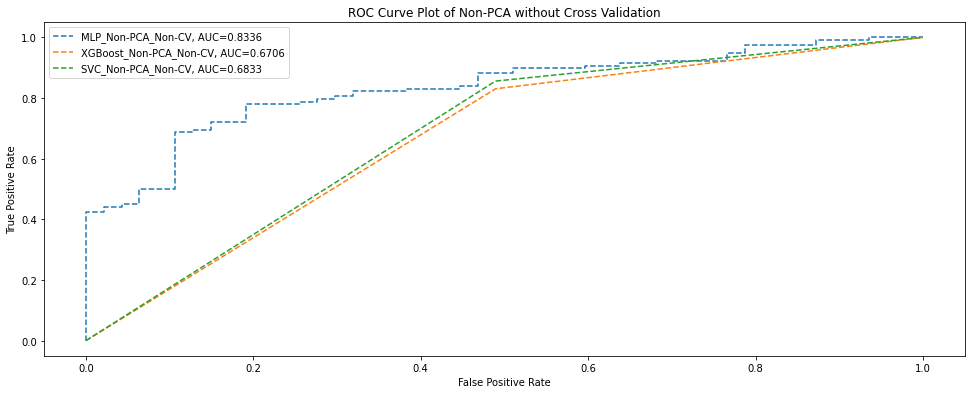

In [ ]:
plt.gcf().set_size_inches(16.5, 13.5)
plt.subplot(211)
plt.plot(fpr_mlp,tpr_mlp, linestyle='--',label="MLP_Non-PCA_Non-CV, AUC="+str(auc_mlp))
plt.subplot(211)
plt.plot(fpr_xgb,tpr_xgb, linestyle='--',label="XGBoost_Non-PCA_Non-CV, AUC="+str(auc_xgb))
plt.subplot(211)
plt.plot(fpr_svc,tpr_svc, linestyle='--',label="SVC_Non-PCA_Non-CV, AUC="+str(auc_svc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve Plot of Non-PCA without Cross Validation")
plt.legend()

### Training Models with Non-PCA X Imputed by Multivariate Model and with Cross Validation

In [ ]:

# K-fold Cross Validation model evaluation
acc_per_fold=[]
loss_per_fold=[]
inputs =np.array(X)
targets = np.array(y)
kfold = KFold(n_splits=3, shuffle=True)
fold_no = 1
for train, test in kfold.split(inputs, targets):

  # Define the model architecture
  model = Sequential()
  model.add(Dense(216, activation='relu', input_dim=(214)))
  model.add(Dense(218, activation='relu'))
  model.add(Dense(num_classes, activation='sigmoid'))

  # Compile the model
  model.compile(loss='binary_crossentropy',
              optimizer='RMSprop',
              metrics=['accuracy'])


  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  # Fit data to model
  history = model.fit(inputs[train], targets[train],
              batch_size=batch_size,
              epochs=epochs,
              verbose=0)
  # Generate generalization metrics
  scores = model.evaluate(inputs[test], targets[test], verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  # Increase fold number
  fold_no = fold_no + 1
y_pred=np.round(model.predict(inputs[test])).ravel()
print("\nCR by library method=\n",
          classification_report(targets[test], y_pred))

------------------------------------------------------------------------
Training for fold 1 ...
Score for fold 1: loss of 0.9587986469268799; accuracy of 75.90909004211426%
------------------------------------------------------------------------
Training for fold 2 ...
Score for fold 2: loss of 0.6106985211372375; accuracy of 81.73515796661377%
------------------------------------------------------------------------
Training for fold 3 ...
Score for fold 3: loss of 1.0882402658462524; accuracy of 72.60273694992065%

CR by library method=
               precision    recall  f1-score   support

           0       0.54      0.51      0.52        65
           1       0.80      0.82      0.81       154

    accuracy                           0.73       219
   macro avg       0.67      0.66      0.67       219
weighted avg       0.72      0.73      0.72       219



In [ ]:
# filename = '/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/2-exp/Multivariate/MLP/Non_PCA_Cross_Validation/MLP_Non_PCA_Cross_Validation.sav'
# pickle.dump(model, open(filename, 'wb')) 

In [ ]:
loaded_model = pickle.load(open('/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/2-exp/Multivariate/MLP/Non_PCA_Cross_Validation/MLP_Non_PCA_Cross_Validation.sav', 'rb'))
y_pred = loaded_model.predict(Xtest)
fpr_mlp, tpr_mlp, _ = metrics.roc_curve(Ytest, y_pred)
auc_mlp = round(metrics.roc_auc_score(Ytest, y_pred), 4)

In [ ]:
y_pred=np.round(loaded_model.predict(inputs[test])).ravel()
print("\nCR by library method=\n",
          classification_report(targets[test], y_pred))


CR by library method=
               precision    recall  f1-score   support

           0       0.98      0.78      0.87        65
           1       0.92      0.99      0.95       154

    accuracy                           0.93       219
   macro avg       0.95      0.89      0.91       219
weighted avg       0.94      0.93      0.93       219



In [ ]:
MLP_Multivariate_imputed_Non_PCA_Cross_Validation_accuracy=float((classification_report(targets[test], y_pred)).split()[15])
MLP_Multivariate_imputed_Non_PCA_Cross_Validation_accuracy

0.93

In [ ]:
# cv = KFold(n_splits=3)
# PARAMETERS = {"subsample":[0.5, 0.75, 1],
#               "colsample_bytree":[0.5, 0.75, 1],
#               "max_depth":[2,5, 6, 12],
#               "min_child_weight":[1,5,15],
#               "learning_rate":[0.3, 0.1, 0.03],
#               "n_estimators":[100,500,1000]}
# full = xgb.XGBClassifier(n_estimators=100, n_jobs=-1)
# model_gs = GridSearchCV(full,param_grid=PARAMETERS,cv=cv,scoring="accuracy")
# model_gs.fit(np.array(Xtrain),Ytrain, eval_metric="error",verbose=0)
# y_pred=model_gs.predict(np.array(Xtest))
# print("The accuracy is %.2f"%(accuracy_score(y_pred,Ytest)*100),"%")

In [ ]:
# filename = '/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/2-exp/Multivariate/XGB/Non_PCA_Cross_Validation/XGB_Non_PCA_Cross_Validation.sav'
# pickle.dump(model_gs, open(filename, 'wb')) 


In [ ]:
loadedmodel = pickle.load(open('/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/2-exp/Multivariate/XGB/Non_PCA_Cross_Validation/XGB_Non_PCA_Cross_Validation.sav', 'rb'))
y_pred = loadedmodel.predict(np.array(Xtest))
fpr_xgb, tpr_xgb, _ = metrics.roc_curve(Ytest, y_pred)
auc_xgb = round(metrics.roc_auc_score(Ytest, y_pred), 4)


In [ ]:
y_pred=np.round(loadedmodel.predict(np.array(Xtest))).ravel()
print("\nCR by library method=\n",
          classification_report(Ytest, y_pred))


CR by library method=
               precision    recall  f1-score   support

           0       0.56      0.51      0.53        47
           1       0.81      0.84      0.82       118

    accuracy                           0.75       165
   macro avg       0.68      0.67      0.68       165
weighted avg       0.74      0.75      0.74       165



In [ ]:
XGBoost_Multivariate_imputed_Non_PCA_Cross_Validation_accuracy=float(classification_report(Ytest, y_pred).split()[15])
XGBoost_Multivariate_imputed_Non_PCA_Cross_Validation_accuracy

0.75

In [ ]:
# tuned_parameters =  [{'kernel': ['rbf'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
#                      'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]},
#                     {'kernel': ['sigmoid'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
#                      'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000] },{'kernel': ['linear'], 'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]}] 
# clf = GridSearchCV(SVC(), tuned_parameters, cv=cv,
#                        scoring='accuracy')
# clf.fit(Xtrain,Ytrain)
# y_pred=clf.predict(Xtest)
# print("The accuracy is %.2f"%(accuracy_score(y_pred,Ytest)*100),"%")

In [ ]:
# filename = '/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/2-exp/Multivariate/SVM/Non_PCA_Cross_Validation/SVM_Non_PCA_Cross_Validation.sav'
# pickle.dump(clf, open(filename, 'wb')) 


In [ ]:
loaded_model = pickle.load(open('/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/2-exp/Multivariate/SVM/Non_PCA_Cross_Validation/SVM_Non_PCA_Cross_Validation.sav', 'rb'))
y_pred = loaded_model.predict(Xtest)
fpr_svc, tpr_svc, _ = metrics.roc_curve(Ytest, y_pred)
auc_svc = round(metrics.roc_auc_score(Ytest, y_pred), 4)

In [ ]:
y_pred=np.round(loaded_model.predict(Xtest)).ravel()
print("\nCR by library method=\n",
          classification_report(Ytest, y_pred))


CR by library method=
               precision    recall  f1-score   support

           0       0.59      0.51      0.55        47
           1       0.81      0.86      0.83       118

    accuracy                           0.76       165
   macro avg       0.70      0.68      0.69       165
weighted avg       0.75      0.76      0.75       165



In [ ]:
SVC_Multivariate_imputed_Non_PCA_Cross_Validation_accuracy=float(classification_report(Ytest, y_pred).split()[15])
SVC_Multivariate_imputed_Non_PCA_Cross_Validation_accuracy

0.76

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


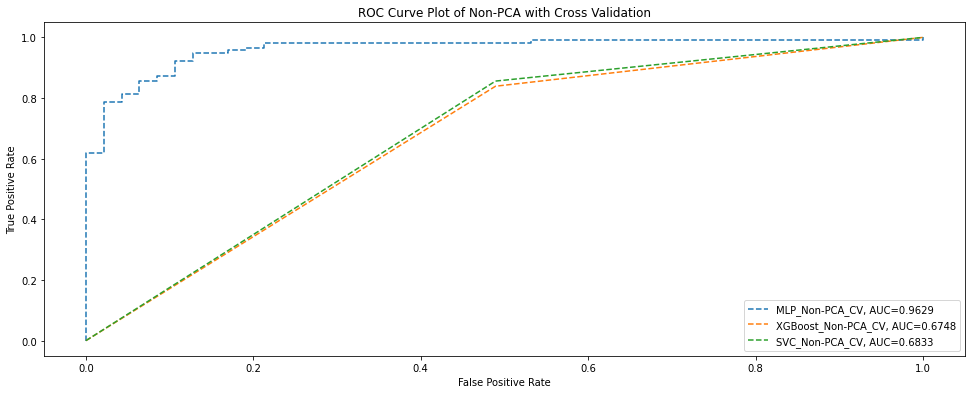

In [ ]:
plt.gcf().set_size_inches(16.5, 13.5)
plt.subplot(211)
plt.plot(fpr_mlp,tpr_mlp, linestyle='--',label="MLP_Non-PCA_CV, AUC="+str(auc_mlp))
plt.subplot(211)
plt.plot(fpr_xgb,tpr_xgb, linestyle='--',label="XGBoost_Non-PCA_CV, AUC="+str(auc_xgb))
plt.subplot(211)
plt.plot(fpr_svc,tpr_svc, linestyle='--',label="SVC_Non-PCA_CV, AUC="+str(auc_svc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve Plot of Non-PCA with Cross Validation")
plt.legend()

# Joining and Scaling Data Imputed by the Univariate Imputation method

In [ ]:

univariate_scaled=StandardScaler().fit_transform(simple_imputed_df)
univariate_imputed_df=pd.DataFrame(univariate_scaled, columns=numeric_data.columns)

In [ ]:
data=pd.concat([univariate_imputed_df,objects], axis=1)
y=data['DEATH?']
X=data.iloc[:,:-1]

In [ ]:
pca = PCA()
pca.fit(X)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X)

In [ ]:
# number of components
n_pcs= pca.components_.shape[0]

# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]

initial_feature_names = X.columns
# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

# LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}

# build the dataframe
df = pd.DataFrame(dic.items())

In [ ]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X_reduced,y,random_state=42,stratify=y)

In [ ]:
X_reduced.shape

(658, 56)

### Training Models with PCA X Imputed by Univariate Model and without Cross Validation



In [ ]:
model = Sequential()
model.add(Dense(58, activation='relu', input_dim=(56)))
model.add(Dense(60, activation='relu'))
# model.add(Dense(128, activation='relu'))
# model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='RMSprop',
              metrics=['accuracy'])
history = model.fit(Xtrain, Ytrain,batch_size=batch_size,epochs=epochs,verbose=0,
                    validation_data=(Xtest, Ytest))

In [ ]:
loss,accuracy=model.evaluate(Xtest,Ytest)
print("Accuracy: %.2f"%(accuracy*100),"%")

6/6 [==============================] - 0s 3ms/step - loss: 0.8310 - accuracy: 0.7636
Accuracy: 76.36 %


In [ ]:
filename = '/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/2-exp/Univariate/MLP/PCA_Without_Cross_Validation/MLP_PCA_Without_Cross_Validation.sav'
pickle.dump(model, open(filename, 'wb')) 


INFO:tensorflow:Assets written to: ram://048b88cb-920f-4612-a05f-42cdf2815784/assets


In [ ]:
loaded_model = pickle.load(open('/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/2-exp/Univariate/MLP/PCA_Without_Cross_Validation/MLP_PCA_Without_Cross_Validation.sav', 'rb'))
y_pred = loaded_model.predict(Xtest)
fpr_mlp, tpr_mlp, _ = metrics.roc_curve(Ytest, y_pred)
auc_mlp = round(metrics.roc_auc_score(Ytest, y_pred), 4)

In [ ]:
y_pred=np.round(loaded_model.predict(Xtest)).ravel()
print("\nCR by library method=\n",
          classification_report(Ytest, y_pred))


CR by library method=
               precision    recall  f1-score   support

           0       0.58      0.60      0.59        47
           1       0.84      0.83      0.83       118

    accuracy                           0.76       165
   macro avg       0.71      0.71      0.71       165
weighted avg       0.77      0.76      0.76       165



In [ ]:
MLP_Univariate_imputed_PCA_Non_Cross_accuracy=float(classification_report(Ytest, y_pred).split()[15])
MLP_Univariate_imputed_PCA_Non_Cross_accuracy

0.76

In [ ]:
model=xgb.XGBClassifier(learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
model.fit(Xtrain, Ytrain)
y_pred=model.predict(Xtest)
print("The accuracy is %.2f"%(accuracy_score(y_pred,Ytest)*100),"%")

The accuracy is 77.58 %


In [ ]:
filename = '/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/2-exp/Univariate/XGB/PCA_Without_Cross_Validation/XGB_PCA_Without_Cross_Validation.sav'
pickle.dump(model, open(filename, 'wb')) 


In [ ]:
loaded_model = pickle.load(open('/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/2-exp/Univariate/XGB/PCA_Without_Cross_Validation/XGB_PCA_Without_Cross_Validation.sav', 'rb'))
y_pred = loaded_model.predict(Xtest)
fpr_xgb, tpr_xgb, _ = metrics.roc_curve(Ytest, y_pred)
auc_xgb = round(metrics.roc_auc_score(Ytest, y_pred), 4)


In [ ]:
y_pred=np.round(loaded_model.predict(Xtest)).ravel()
print("\nCR by library method=\n",
          classification_report(Ytest, y_pred))


CR by library method=
               precision    recall  f1-score   support

           0       0.63      0.51      0.56        47
           1       0.82      0.88      0.85       118

    accuracy                           0.78       165
   macro avg       0.73      0.70      0.71       165
weighted avg       0.77      0.78      0.77       165



In [ ]:
XGBoost_Univariate_imputed_PCA_accuracy=float(classification_report(Ytest, y_pred).split()[15])
XGBoost_Univariate_imputed_PCA_accuracy

0.78

In [ ]:
clf=SVC()
clf.fit(Xtrain,Ytrain)
y_pred=clf.predict(Xtest)
print("The accuracy is %.2f"%(accuracy_score(y_pred,Ytest)*100),"%")

The accuracy is 73.94 %


In [ ]:
filename = '/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/2-exp/Univariate/SVM/PCA_Without_Cross_Validation/SVM_PCA_Without_Cross_Validation.sav'
pickle.dump(clf, open(filename, 'wb')) 


In [ ]:
loaded_model = pickle.load(open('/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/2-exp/Univariate/SVM/PCA_Without_Cross_Validation/SVM_PCA_Without_Cross_Validation.sav', 'rb'))
y_pred = loaded_model.predict(Xtest)
fpr_svc, tpr_svc, _ = metrics.roc_curve(Ytest, y_pred)
auc_svc = round(metrics.roc_auc_score(Ytest, y_pred), 4)


In [ ]:
y_pred=np.round(loaded_model.predict(Xtest)).ravel()
print("\nCR by library method=\n",
          classification_report(Ytest, y_pred))


CR by library method=
               precision    recall  f1-score   support

           0       0.55      0.47      0.51        47
           1       0.80      0.85      0.82       118

    accuracy                           0.74       165
   macro avg       0.68      0.66      0.66       165
weighted avg       0.73      0.74      0.73       165



In [ ]:
SVC_Univariate_imputed_PCA_accuracy=float(classification_report(Ytest, y_pred).split()[15])
SVC_Univariate_imputed_PCA_accuracy

0.74

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


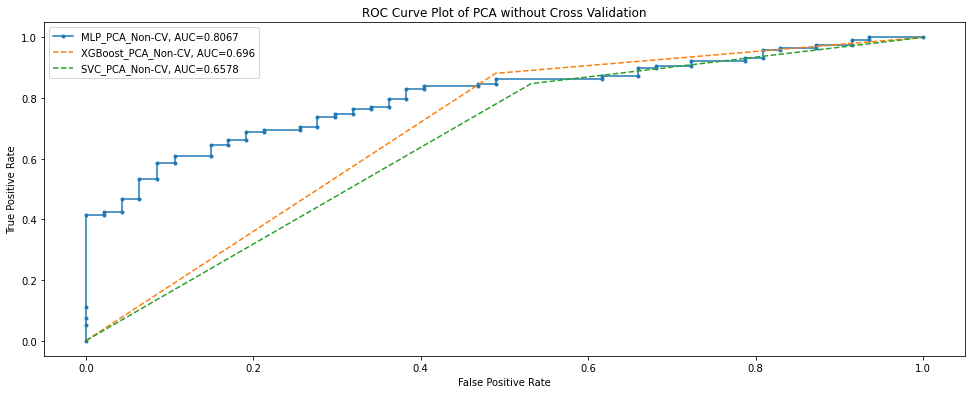

In [ ]:
plt.gcf().set_size_inches(16.5, 13.5)
plt.subplot(211)
plt.plot(fpr_mlp,tpr_mlp,marker='.',label="MLP_PCA_Non-CV, AUC="+str(auc_mlp))
plt.subplot(211)
plt.plot(fpr_xgb,tpr_xgb,linestyle='--',label="XGBoost_PCA_Non-CV, AUC="+str(auc_xgb))
plt.subplot(211)
plt.plot(fpr_svc,tpr_svc,linestyle='--',label="SVC_PCA_Non-CV, AUC="+str(auc_svc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve Plot of PCA without Cross Validation")
plt.legend()

## Training Models with PCA X Imputed by Univariate Model and with Cross Validation

In [ ]:

# K-fold Cross Validation model evaluation
acc_per_fold=[]
loss_per_fold=[]
inputs =np.array(X_reduced)
targets = np.array(y)
kfold = KFold(n_splits=3, shuffle=True)
fold_no = 1
for train, test in kfold.split(inputs, targets):

  # Define the model architecture
  model = Sequential()
  model.add(Dense(58, activation='relu', input_dim=(56)))
  model.add(Dense(60, activation='relu'))
  model.add(Dense(num_classes, activation='sigmoid'))

  # Compile the model
  model.compile(loss='binary_crossentropy',
              optimizer='RMSprop',
              metrics=['accuracy'])


  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  # Fit data to model
  history = model.fit(inputs[train], targets[train],
              batch_size=batch_size,
              epochs=epochs,
              verbose=0)
  # Generate generalization metrics
  scores = model.evaluate(inputs[test], targets[test], verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  # Increase fold number
  fold_no = fold_no + 1
y_pred=np.round(model.predict(inputs[test])).ravel()
print("\nCR by library method=\n",
          classification_report(targets[test], y_pred))

------------------------------------------------------------------------
Training for fold 1 ...
Score for fold 1: loss of 0.49006813764572144; accuracy of 78.63636612892151%
------------------------------------------------------------------------
Training for fold 2 ...
Score for fold 2: loss of 0.8878279328346252; accuracy of 75.79908967018127%
------------------------------------------------------------------------
Training for fold 3 ...
Score for fold 3: loss of 0.5935280919075012; accuracy of 75.79908967018127%

CR by library method=
               precision    recall  f1-score   support

           0       0.54      0.53      0.53        57
           1       0.83      0.84      0.84       162

    accuracy                           0.76       219
   macro avg       0.69      0.68      0.68       219
weighted avg       0.76      0.76      0.76       219



In [ ]:
filename = '/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/2-exp/Univariate/MLP/PCA_Cross_Validation/MLP_PCA_Cross_Validation.sav'
pickle.dump(model, open(filename, 'wb')) 


INFO:tensorflow:Assets written to: ram://e1be9793-367b-4dc1-80b8-c89f253a9771/assets


In [ ]:
loaded_model = pickle.load(open('/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/2-exp/Univariate/MLP/PCA_Cross_Validation/MLP_PCA_Cross_Validation.sav', 'rb'))
y_pred = loaded_model.predict(Xtest)
fpr_mlp, tpr_mlp, _ = metrics.roc_curve(Ytest, y_pred)
auc_mlp = round(metrics.roc_auc_score(Ytest, y_pred), 4)

In [ ]:
y_pred=np.round(loaded_model.predict(inputs[test])).ravel()
print("\nCR by library method=\n",
          classification_report(targets[test], y_pred))


CR by library method=
               precision    recall  f1-score   support

           0       0.54      0.53      0.53        57
           1       0.83      0.84      0.84       162

    accuracy                           0.76       219
   macro avg       0.69      0.68      0.68       219
weighted avg       0.76      0.76      0.76       219



In [ ]:
MLP_Univariate_imputed_PCA_Cross_Validation_accuracy=float((classification_report(targets[test], y_pred)).split()[15])
MLP_Univariate_imputed_PCA_Cross_Validation_accuracy

0.76

In [ ]:
cv = KFold(n_splits=3)
PARAMETERS = {"subsample":[0.5, 0.75, 1],
              "colsample_bytree":[0.5, 0.75, 1],
              "max_depth":[2,5, 6, 12],
              "min_child_weight":[1,5,15],
              "learning_rate":[0.3, 0.1, 0.03],
              "n_estimators":[100,500,1000]}
full = xgb.XGBClassifier(n_estimators=100, n_jobs=-1)
model_gs = GridSearchCV(full,param_grid=PARAMETERS,cv=cv,scoring="accuracy")
model_gs.fit(np.array(Xtrain),Ytrain, eval_metric="error",verbose=0)
y_pred=model_gs.predict(np.array(Xtest))
print("The accuracy is %.2f"%(accuracy_score(y_pred,Ytest)*100),"%")

The accuracy is 75.15 %


In [ ]:
filename = '/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/2-exp/Univariate/XGB/PCA_Cross_Validation/XGB_PCA_Cross_Validation.sav'
pickle.dump(model_gs, open(filename, 'wb')) 


In [ ]:
loaded_model = pickle.load(open('/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/2-exp/Univariate/XGB/PCA_Cross_Validation/XGB_PCA_Cross_Validation.sav', 'rb'))
y_pred = loaded_model.predict(Xtest)
fpr_xgb, tpr_xgb, _ = metrics.roc_curve(Ytest, y_pred)
auc_xgb= round(metrics.roc_auc_score(Ytest, y_pred), 4)


In [ ]:
y_pred=np.round(loaded_model.predict(np.array(Xtest))).ravel()
print("\nCR by library method=\n",
          classification_report(Ytest, y_pred))


CR by library method=
               precision    recall  f1-score   support

           0       0.58      0.45      0.51        47
           1       0.80      0.87      0.83       118

    accuracy                           0.75       165
   macro avg       0.69      0.66      0.67       165
weighted avg       0.74      0.75      0.74       165



In [ ]:
XGBoost_Univariate_imputed_PCA_Cross_Validation_accuracy=float(classification_report(Ytest, y_pred).split()[15])
XGBoost_Univariate_imputed_PCA_Cross_Validation_accuracy

0.75

In [ ]:
tuned_parameters =  [{'kernel': ['rbf'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
                     'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]},
                    {'kernel': ['sigmoid'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
                     'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000] },{'kernel': ['linear'], 'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]}] 
clf = GridSearchCV(SVC(), tuned_parameters, cv=cv,
                       scoring='accuracy')
clf.fit(Xtrain,Ytrain)
y_pred=clf.predict(Xtest)
print("The accuracy is %.2f"%(accuracy_score(y_pred,Ytest)*100),"%")

The accuracy is 77.58 %


In [ ]:
filename = '/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/2-exp/Univariate/SVM/PCA_Cross_Validation/SVM_PCA_Cross_Validation.sav'
pickle.dump(clf, open(filename, 'wb')) 


In [ ]:
loaded_model = pickle.load(open('/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/2-exp/Univariate/SVM/PCA_Cross_Validation/SVM_PCA_Cross_Validation.sav', 'rb'))
y_pred = loaded_model.predict(Xtest)
fpr_svc, tpr_svc, _ = metrics.roc_curve(Ytest, y_pred)
auc_svc = round(metrics.roc_auc_score(Ytest, y_pred), 4)

In [ ]:
y_pred=np.round(loaded_model.predict(Xtest)).ravel()
print("\nCR by library method=\n",
          classification_report(Ytest, y_pred))


CR by library method=
               precision    recall  f1-score   support

           0       0.60      0.62      0.61        47
           1       0.85      0.84      0.84       118

    accuracy                           0.78       165
   macro avg       0.73      0.73      0.73       165
weighted avg       0.78      0.78      0.78       165



In [ ]:
SVC_Univariate_imputed_PCA_Cross_Validation_accuracy=float(classification_report(Ytest, y_pred).split()[15])
SVC_Univariate_imputed_PCA_Cross_Validation_accuracy

0.78

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


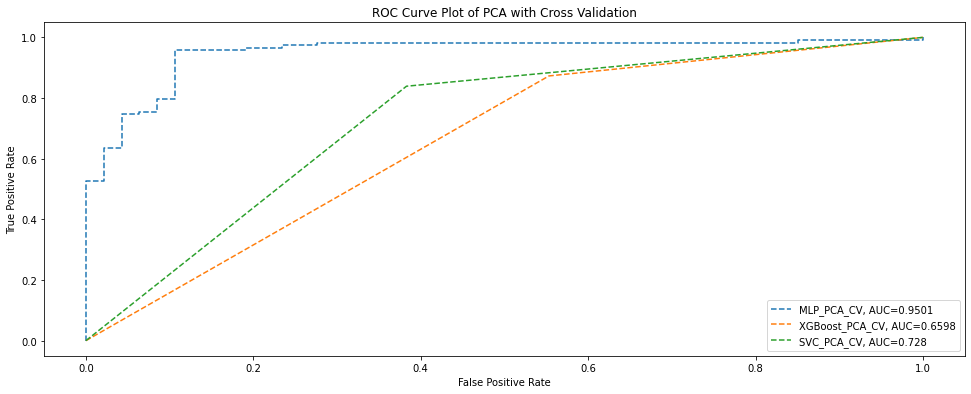

In [ ]:
plt.gcf().set_size_inches(16.5, 13.5)
plt.subplot(211)
plt.plot(fpr_mlp,tpr_mlp,linestyle='--',label="MLP_PCA_CV, AUC="+str(auc_mlp))
plt.subplot(211)
plt.plot(fpr_xgb,tpr_xgb,linestyle='--',label="XGBoost_PCA_CV, AUC="+str(auc_xgb))
plt.subplot(211)
plt.plot(fpr_svc,tpr_svc,linestyle='--',label="SVC_PCA_CV, AUC="+str(auc_svc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve Plot of PCA with Cross Validation")
plt.legend()

# Training Models with Non-PCA X Imputed by Univariate Model and without Cross Validation

In [ ]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,y,random_state=42,stratify=y)

In [ ]:
m = Sequential()
m.add(Dense(216, activation='relu', input_dim=(214)))
m.add(Dense(218, activation='relu'))
# m.add(Dense(128, activation='relu'))
# m.add(Dense(64, activation='relu'))
m.add(Dense(num_classes, activation='sigmoid'))

In [ ]:
m.compile(loss='binary_crossentropy',
              optimizer='RMSprop',
              metrics=['accuracy'])
history = m.fit(Xtrain, Ytrain,batch_size=batch_size,epochs=epochs,verbose=0,
                    validation_data=(Xtest, Ytest))

In [ ]:
loss,accuracy=m.evaluate(Xtest,Ytest)
print("Accuracy: %.2f"%(accuracy*100),"%")

6/6 [==============================] - 0s 3ms/step - loss: 0.8533 - accuracy: 0.7576
Accuracy: 75.76 %


In [ ]:
filename = '/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/2-exp/Univariate/MLP/Non_PCA_Without_Cross_Validation/MLP_Non_PCA_Without_Cross_Validation.sav'
pickle.dump(m, open(filename, 'wb')) 


INFO:tensorflow:Assets written to: ram://b1c818c2-400c-470c-ba8c-2a47f0dc60a0/assets


In [ ]:
loaded_model = pickle.load(open('/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/2-exp/Univariate/MLP/Non_PCA_Without_Cross_Validation/MLP_Non_PCA_Without_Cross_Validation.sav', 'rb'))
y_pred = loaded_model.predict(Xtest)
fpr_mlp, tpr_mlp, _ = metrics.roc_curve(Ytest, y_pred)
auc_mlp = round(metrics.roc_auc_score(Ytest, y_pred), 4)

In [ ]:
y_pred=np.round(loaded_model.predict(Xtest)).ravel()
print("\nCR by library method=\n",
          classification_report(Ytest, y_pred))


CR by library method=
               precision    recall  f1-score   support

           0       0.57      0.60      0.58        47
           1       0.84      0.82      0.83       118

    accuracy                           0.76       165
   macro avg       0.70      0.71      0.71       165
weighted avg       0.76      0.76      0.76       165



In [ ]:
MLP_Univariate_imputed_Non_PCA_Non_Cross_accuracy=float(classification_report(Ytest, y_pred).split()[15])
MLP_Univariate_imputed_Non_PCA_Non_Cross_accuracy

0.76

In [ ]:
full_boost=xgb.XGBClassifier(learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
full_boost.fit(np.array(Xtrain), Ytrain)
y_pred=full_boost.predict(np.array(Xtest))
print("The accuracy is %.2f"%(accuracy_score(y_pred,Ytest)*100),"%")

The accuracy is 73.94 %


In [ ]:
filename = '/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/2-exp/Univariate/XGB/Non_PCA_Without_Cross_Validation/XGB_Non_PCA_Without_Cross_Validation.sav' 
pickle.dump(full_boost, open(filename, 'wb')) 


In [ ]:
loadedmodel = pickle.load(open('/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/2-exp/Univariate/XGB/Non_PCA_Without_Cross_Validation/XGB_Non_PCA_Without_Cross_Validation.sav', 'rb'))
y_pred = loadedmodel.predict(np.array(Xtest))
fpr_xgb, tpr_xgb, _ = metrics.roc_curve(Ytest, y_pred)
auc_xgb = round(metrics.roc_auc_score(Ytest, y_pred), 4)


In [ ]:
y_pred=np.round(loadedmodel.predict(np.array(Xtest))).ravel()
print("\nCR by library method=\n",
          classification_report(Ytest, y_pred))


CR by library method=
               precision    recall  f1-score   support

           0       0.55      0.51      0.53        47
           1       0.81      0.83      0.82       118

    accuracy                           0.74       165
   macro avg       0.68      0.67      0.67       165
weighted avg       0.73      0.74      0.74       165



In [ ]:
XGBoost_Univariate_imputed_Non_PCA_Non_Cross_accuracy=float(classification_report(Ytest, y_pred).split()[15])
XGBoost_Univariate_imputed_Non_PCA_Non_Cross_accuracy

0.74

In [ ]:
clf=SVC()
clf.fit(Xtrain,Ytrain)
y_pred=clf.predict(Xtest)
print("The accuracy is %.2f"%(accuracy_score(y_pred,Ytest)*100),"%")

The accuracy is 75.76 %


In [ ]:
filename = '/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/2-exp/Univariate/SVM/Non_PCA_Without_Cross_Validation/SVM_Non_PCA_Without_Cross_Validation.sav'
pickle.dump(clf, open(filename, 'wb')) 


In [ ]:
loaded_model = pickle.load(open('/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/2-exp/Univariate/SVM/Non_PCA_Without_Cross_Validation/SVM_Non_PCA_Without_Cross_Validation.sav', 'rb'))
y_pred = loaded_model.predict(Xtest)
fpr_svc, tpr_svc, _ = metrics.roc_curve(Ytest, y_pred)
auc_svc = round(metrics.roc_auc_score(Ytest, y_pred), 4)

In [ ]:
y_pred=np.round(loaded_model.predict(Xtest)).ravel()
print("\nCR by library method=\n",
          classification_report(Ytest, y_pred))


CR by library method=
               precision    recall  f1-score   support

           0       0.59      0.51      0.55        47
           1       0.81      0.86      0.83       118

    accuracy                           0.76       165
   macro avg       0.70      0.68      0.69       165
weighted avg       0.75      0.76      0.75       165



In [ ]:
SVC_Univariate_imputed_Non_PCA_Non_Cross_accuracy=float(classification_report(Ytest, y_pred).split()[15])
SVC_Univariate_imputed_Non_PCA_Non_Cross_accuracy

0.76

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


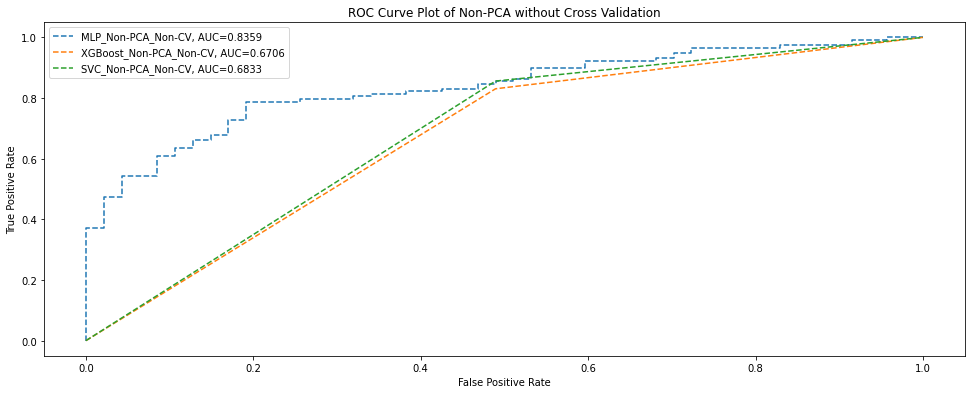

In [ ]:
plt.gcf().set_size_inches(16.5, 13.5)
plt.subplot(211)
plt.plot(fpr_mlp,tpr_mlp, linestyle='--',label="MLP_Non-PCA_Non-CV, AUC="+str(auc_mlp))
plt.subplot(211)
plt.plot(fpr_xgb,tpr_xgb, linestyle='--',label="XGBoost_Non-PCA_Non-CV, AUC="+str(auc_xgb))
plt.subplot(211)
plt.plot(fpr_svc,tpr_svc, linestyle='--',label="SVC_Non-PCA_Non-CV, AUC="+str(auc_svc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve Plot of Non-PCA without Cross Validation")
plt.legend()

# Training Models with Non-PCA X Imputed by Univariate Model and with Cross Validation

In [ ]:

# K-fold Cross Validation model evaluation
acc_per_fold=[]
loss_per_fold=[]
inputs =np.array(X)
targets = np.array(y)
kfold = KFold(n_splits=3, shuffle=True)
fold_no = 1
for train, test in kfold.split(inputs, targets):

  # Define the model architecture
  model = Sequential()
  model.add(Dense(216, activation='relu', input_dim=(214)))
  model.add(Dense(218, activation='relu'))
  model.add(Dense(num_classes, activation='sigmoid'))

  # Compile the model
  model.compile(loss='binary_crossentropy',
              optimizer='RMSprop',
              metrics=['accuracy'])


  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  # Fit data to model
  history = model.fit(inputs[train], targets[train],
              batch_size=batch_size,
              epochs=epochs,
              verbose=0)
  # Generate generalization metrics
  scores = model.evaluate(inputs[test], targets[test], verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  # Increase fold number
  fold_no = fold_no + 1
y_pred=np.round(model.predict(inputs[test])).ravel()
print("\nCR by library method=\n",
          classification_report(targets[test], y_pred))

------------------------------------------------------------------------
Training for fold 1 ...
Score for fold 1: loss of 1.9306693077087402; accuracy of 73.18181991577148%
------------------------------------------------------------------------
Training for fold 2 ...
Score for fold 2: loss of 1.0283918380737305; accuracy of 75.79908967018127%
------------------------------------------------------------------------
Training for fold 3 ...
Score for fold 3: loss of 0.7141172289848328; accuracy of 78.53881120681763%

CR by library method=
               precision    recall  f1-score   support

           0       0.55      0.67      0.61        54
           1       0.88      0.82      0.85       165

    accuracy                           0.79       219
   macro avg       0.72      0.75      0.73       219
weighted avg       0.80      0.79      0.79       219



In [ ]:
filename = '/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/2-exp/Univariate/MLP/Non_PCA_Cross_Validation/MLP_Non_PCA_Cross_Validation.sav'
pickle.dump(model, open(filename, 'wb')) 


INFO:tensorflow:Assets written to: ram://eb513d95-58c6-42ae-b60a-b6273e835f69/assets


INFO:tensorflow:Assets written to: ram://eb513d95-58c6-42ae-b60a-b6273e835f69/assets


In [ ]:
loaded_model = pickle.load(open('/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/2-exp/Univariate/MLP/Non_PCA_Cross_Validation/MLP_Non_PCA_Cross_Validation.sav', 'rb'))
y_pred = loaded_model.predict(Xtest)
fpr_mlp, tpr_mlp, _ = metrics.roc_curve(Ytest, y_pred)
auc_mlp = round(metrics.roc_auc_score(Ytest, y_pred), 4)

In [ ]:
y_pred=np.round(loaded_model.predict(np.array(Xtest))).ravel()
print("\nCR by library method=\n",
          classification_report(Ytest, y_pred))


CR by library method=
               precision    recall  f1-score   support

           0       0.81      0.83      0.82        47
           1       0.93      0.92      0.93       118

    accuracy                           0.90       165
   macro avg       0.87      0.88      0.87       165
weighted avg       0.90      0.90      0.90       165



In [ ]:
cv = KFold(n_splits=3)
PARAMETERS = {"subsample":[0.5, 0.75, 1],
              "colsample_bytree":[0.5, 0.75, 1],
              "max_depth":[2,5, 6, 12],
              "min_child_weight":[1,5,15],
              "learning_rate":[0.3, 0.1, 0.03],
              "n_estimators":[100,500,1000]}
full = xgb.XGBClassifier(n_estimators=100, n_jobs=-1)
model_gs = GridSearchCV(full,param_grid=PARAMETERS,cv=cv,scoring="accuracy")
model_gs.fit(np.array(Xtrain),Ytrain, eval_metric="error",verbose=0)
y_pred=model_gs.predict(np.array(Xtest))
print("The accuracy is %.2f"%(accuracy_score(y_pred,Ytest)*100),"%")

The accuracy is 74.55 %


In [ ]:
filename = '/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/2-exp/Univariate/XGB/Non_PCA_Cross_Validation/XGB_Non_PCA_Cross_Validation.sav'
pickle.dump(model_gs, open(filename, 'wb')) 


In [ ]:
loadedmodel = pickle.load(open('/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/2-exp/Univariate/XGB/Non_PCA_Cross_Validation/XGB_Non_PCA_Cross_Validation.sav', 'rb'))
y_pred = loadedmodel.predict(np.array(Xtest))
fpr_xgb, tpr_xgb, _ = metrics.roc_curve(Ytest, y_pred)
auc_xgb = round(metrics.roc_auc_score(Ytest, y_pred), 4)


In [ ]:
y_pred=np.round(loadedmodel.predict(np.array(Xtest))).ravel()
print("\nCR by library method=\n",
          classification_report(Ytest, y_pred))


CR by library method=
               precision    recall  f1-score   support

           0       0.56      0.51      0.53        47
           1       0.81      0.84      0.82       118

    accuracy                           0.75       165
   macro avg       0.68      0.67      0.68       165
weighted avg       0.74      0.75      0.74       165



In [ ]:
XGBoost_Univariate_imputed_Non_PCA_Cross_Validation_accuracy=float(classification_report(Ytest, y_pred).split()[15])
XGBoost_Univariate_imputed_Non_PCA_Cross_Validation_accuracy

0.75

In [ ]:
tuned_parameters =  [{'kernel': ['rbf'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
                     'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]},
                    {'kernel': ['sigmoid'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
                     'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000] },{'kernel': ['linear'], 'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]}] 
clf = GridSearchCV(SVC(), tuned_parameters, cv=cv,
                       scoring='accuracy')
clf.fit(Xtrain,Ytrain)
y_pred=clf.predict(Xtest)
print("The accuracy is %.2f"%(accuracy_score(y_pred,Ytest)*100),"%")

The accuracy is 75.76 %


In [ ]:
filename = '/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/2-exp/Univariate/SVM/Non_PCA_Cross_Validation/SVM_Non_PCA_Cross_Validation.sav'
pickle.dump(clf, open(filename, 'wb')) 


In [ ]:
loaded_model = pickle.load(open('/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/2-exp/Univariate/SVM/Non_PCA_Cross_Validation/SVM_Non_PCA_Cross_Validation.sav', 'rb'))
y_pred = loaded_model.predict(Xtest)
fpr_svc, tpr_svc, _ = metrics.roc_curve(Ytest, y_pred)
auc_svc = round(metrics.roc_auc_score(Ytest, y_pred), 4)

In [ ]:
y_pred=np.round(loaded_model.predict(Xtest)).ravel()
print("\nCR by library method=\n",
          classification_report(Ytest, y_pred))


CR by library method=
               precision    recall  f1-score   support

           0       0.59      0.51      0.55        47
           1       0.81      0.86      0.83       118

    accuracy                           0.76       165
   macro avg       0.70      0.68      0.69       165
weighted avg       0.75      0.76      0.75       165



In [ ]:
SVC_Univariate_imputed_Non_PCA_Cross_Validation_accuracy=float(classification_report(Ytest, y_pred).split()[15])
SVC_Univariate_imputed_Non_PCA_Cross_Validation_accuracy

0.76

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


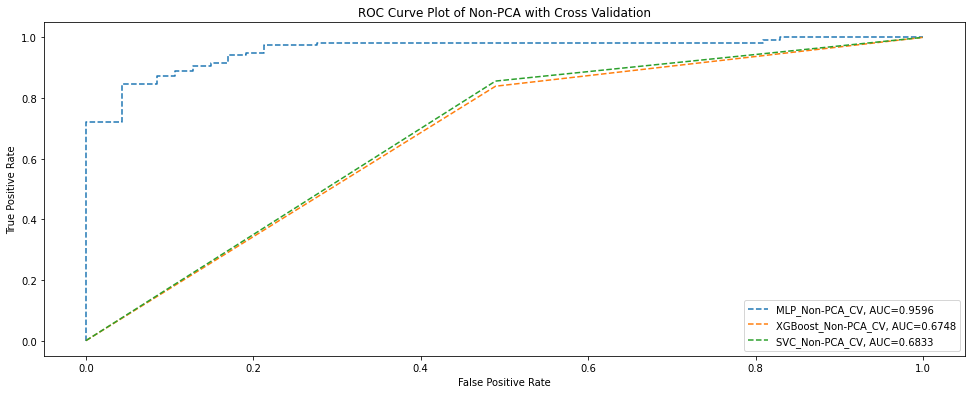

In [ ]:
plt.gcf().set_size_inches(16.5, 13.5)
plt.subplot(211)
plt.plot(fpr_mlp,tpr_mlp, linestyle='--',label="MLP_Non-PCA_CV, AUC="+str(auc_mlp))
plt.subplot(211)
plt.plot(fpr_xgb,tpr_xgb, linestyle='--',label="XGBoost_Non-PCA_CV, AUC="+str(auc_xgb))
plt.subplot(211)
plt.plot(fpr_svc,tpr_svc, linestyle='--',label="SVC_Non-PCA_CV, AUC="+str(auc_svc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve Plot of Non-PCA with Cross Validation")
plt.legend()